# Chapter 3
Resampling methods

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the bowl
success_rep, success_no_rep, sims = 0, 0, 10000
bowl = ['b','b','b',
        'g','g',
        'y','y','y','y','y']

for i in range(sims):
    # Sample with and without replacement & increment success counters
    sample_rep = np.random.choice(bowl, size=3, replace=True)
    sample_no_rep = np.random.choice(bowl, size=3, replace=False)
    if (sample_rep[0] == 'b') & (sample_rep[1] == 'g') & (sample_rep[2] == 'y'): 
        success_rep += 1
    if (sample_no_rep[0] == 'b') & (sample_no_rep[1] == 'g') & (sample_no_rep[2] == 'y'): 
        success_no_rep += 1

# Calculate probabilities
print("Probability with replacement = {}, without replacement = {}".format(success_rep/sims, 
                                                                           success_no_rep/sims))

Probability with replacement = 0.0304, without replacement = 0.04


In [7]:
wrench_lengths = [ 8.9143694 , 10.99734545, 10.2829785 ,  8.49370529,  9.42139975,
       11.65143654,  7.57332076,  9.57108737, 11.26593626,  9.1332596 ,
        9.32111385,  9.90529103, 11.49138963,  9.361098  ,  9.55601804,
        9.56564872, 12.20593008, 12.18678609, 11.0040539 , 10.3861864 ,
       10.73736858, 11.49073203,  9.06416613, 11.17582904,  8.74611933,
        9.3622485 , 10.9071052 ,  8.5713193 ,  9.85993128,  9.1382451 ,
        9.74438063,  7.20141089,  8.2284669 ,  9.30012277, 10.92746243,
        9.82636432, 10.00284592, 10.68822271,  9.12046366, 10.28362732,
        9.19463348,  8.27233051,  9.60910021, 10.57380586, 10.33858905,
        9.98816951, 12.39236527, 10.41291216, 10.97873601, 12.23814334,
        8.70591468,  8.96121179, 11.74371223,  9.20193726, 10.02968323,
       11.06931597, 10.89070639, 11.75488618, 11.49564414, 11.06939267,
        9.22729129, 10.79486267, 10.31427199,  8.67373454, 11.41729905,
       10.80723653, 10.04549008,  9.76690794,  8.80169886, 10.19952407,
       10.46843912,  9.16884502, 11.16220405,  8.90279695,  7.87689965,
       11.03972709,  9.59663396,  9.87397041,  9.16248328,  8.39403724,
       11.25523737,  9.31113102, 11.66095249, 10.80730819,  9.68524185,
        8.9140976 ,  9.26753801,  8.78747687, 12.08711336, 10.16444123,
       11.15020554,  8.73264795, 10.18103513, 11.17786194,  9.66498924,
       11.03111446,  8.91543209,  8.63652846, 10.37940061,  9.62082357]

# Draw some random sample with replacement and append mean to mean_lengths.
mean_lengths, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(wrench_lengths, replace=True, size=len(wrench_lengths))
    sample_mean = temp_sample.mean()
    mean_lengths.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(np.mean(mean_lengths),
                                                          np.percentile(mean_lengths, [2.5, 97.5])))

Bootstrapped Mean Length = 10.027410755769498, 95% CI = [ 9.8078823  10.23124244]


In [17]:
# data prep
# df.to_csv() -> writes to console...
# then use StringIO to make a string behave as a filehandle
# bob is your uncle - no more column wise composition of dataframes
import pandas as pd
from io import StringIO

df_text = StringIO(',heights,weights\n0,8.748690727326483,302.3732714122496\n1,4.2764871726998495,88.86433822831691\n2,4.443656495473089,168.2275857569426\n3,3.354062755687659,109.2913882235679\n4,7.230815258649357,215.30161885497242\n5,0.8969226062394346,9.606739578506271\n6,8.98962352843296,293.0160749585139\n7,3.9775861982097944,154.43424399588537\n8,6.138078192114197,228.873689137082\n9,5.00125924904518,212.91283327863758\n10,8.424215874089949,311.04567590097116\n11,1.379718581004692,14.498915702222355\n12,4.855165591972985,134.7005638072497\n13,4.731891290663169,193.88432903643917\n14,7.767538884670875,311.03101599088427\n15,3.3002174653719383,109.56390883438375\n16,5.155143584899129,194.4001001760973\n17,3.7442831641572565,93.42762865101616\n18,5.5844274934311855,146.85691831179682\n19,6.665630427431644,203.94647304653645\n20,3.2987616455741575,106.5269694550201\n21,7.789447419679228,259.596250053572\n22,7.3031814411855915,249.85849885521404\n23,6.504988677803737,215.39924290565304\n24,7.301711898528824,272.5424450722504\n25,4.132544281651334,180.32772364098028\n26,5.254219548962704,184.8026207827055\n27,3.6284611314818624,177.74607678787672\n28,4.964223840747968,157.88771666865773\n29,6.560710933476372,216.49729782319955\n30,4.1166784965493814,153.77711394780212\n31,4.706492946288045,155.8572840698147\n32,4.125654599760801,173.82421738604407\n33,3.809588717002561,117.30790971514242\n34,4.157507738326362,178.58012046913865\n35,5.474670802162198,196.46785348302134\n36,3.2653793027294444,178.42459511345004\n37,5.968831395634185,197.30622620599132\n38,8.819604354219742,303.6188047050044\n39,6.984088321154671,248.08438667257568\n40,5.11632889527677,124.54581215763822\n41,3.7247420718303275,145.4226007025249\n42,4.005683412498325,152.22007226907058\n43,8.884909202055493,313.70478116957815\n44,5.601615509552058,157.44664829965458\n45,4.226008706861293,109.24627874092883\n46,5.881830969334932,220.52954689174373\n47,9.700510272957684,368.89732674245283\n48,5.740317904963258,240.7727424692696\n49,6.734406219414838,213.31817958077136\n50,6.100340639911655,187.74197170293837\n51,4.795500307012963,161.04404075333997\n52,3.2149636039557197,63.13047259160427\n53,4.801314555174245,153.32273003000498\n54,5.082211533250444,199.17214460164843\n55,6.673246382364395,274.4286859169892\n56,7.17796682774901,258.20772531208195\n57,7.362204162607115,298.6909869051307\n58,6.071174650508517,222.7629362177749\n59,7.270282328541456,259.24397937742395\n60,3.9912041180066944,135.406114443296\n61,8.005736310466576,284.87419701063004\n62,6.525859640836018,222.03376374816338\n63,4.903814329794569,168.11073273305595\n64,6.477036293074994,210.14897438413297\n65,5.348856573957889,193.68577763332618\n66,7.763258774902853,272.07526749704454\n67,8.539633632844398,261.8976762841511\n68,9.871150813066322,339.4727659135216\n69,2.7070073290237247,73.3534717059679\n70,2.611772389140821,40.207022151409355\n71,4.491068274107097,169.2844808272815\n72,5.820074138895661,242.66980122440765\n73,7.25233784223245,313.0750792047583\n74,6.131269894483211,253.65493454423645\n75,1.455597568351994,29.17587607711827\n76,4.887591974743256,200.44684393371534\n77,7.155949285214493,278.4557000714107\n78,5.960189470728767,158.9108931906413\n79,7.024022360624049,267.372995506628\n80,5.055343714779282,192.616455902063\n81,5.0984838621400055,182.51714143256999\n82,5.873122781976568,212.77471526110003\n83,6.320103294416513,222.66129987318007\n84,5.8965994402535395,247.17937662524957\n85,5.738017291614917,190.78588436072494\n86,4.158675427421938,140.55515512923586\n87,6.255127572641839,219.11418963511895\n88,5.743642541982874,207.9190908481524\n89,7.758967815823839,227.48262852905356\n90,7.897835759803014,311.1235968318297\n91,5.870312834967888,211.115943144955\n92,4.749430099819771,180.45816838931145\n93,4.222539185091556,152.7217712718992\n94,6.346988708128226,217.4835730023908\n95,5.654680136697118,189.0327669469751\n96,4.812292648857849,170.8330962685127\n97,5.587193713668494,199.35308850173303\n98,4.2599983121037415,177.98148480908472\n99,6.896064068144438,250.01368604217217\n100,4.605742870428004,157.8637837308286\n101,7.949015409610998,327.8796671099449\n102,6.3069832835816,188.75876101751794\n103,6.687157046474134,200.54526722900715\n104,3.3101763085179163,124.72122210094777\n105,5.838764866117336,199.04743817684127\n106,6.9811129021925495,199.9740518711184\n107,3.592598796384131,117.93521633899928\n108,4.967562987992756,156.0983103127269\n109,5.5652290933867175,223.06123327915915\n110,2.7537653595064886,80.85049332197099\n111,6.130318784084584,240.82652366464222\n112,7.192321295170067,263.2257878362069\n113,3.7809681183360273,127.17561134063897\n114,6.201091957328215,217.56751422119123\n115,2.8754331775251365,111.35662970422693\n116,5.4226089814678975,132.0903515106689\n117,2.2684552905934106,87.57264536000355\n118,7.742835416471328,261.5212493064755\n119,6.317801075873655,266.0710218152807\n120,5.450766088248443,173.49508916964146\n121,3.9496767616616806,166.80278465828937\n122,8.047511860317552,218.78979950096988\n123,9.434203498509468,350.5627478224386\n124,1.7840362711064959,69.34383833680923\n125,7.972328060905641,272.85606985955405\n126,8.755301506297812,303.413319958265\n127,6.176023393148951,209.6468039946545\n128,3.101463935329628,119.12631797611887\n129,7.226690635088043,249.57795811232353\n130,5.138159395843699,135.14213614408342\n131,4.292158744413485,145.58028463496376\n132,3.0398837286660765,162.26397394395983\n133,6.601074991952431,232.2087798397926\n134,7.085613731838695,255.26617927607194\n135,4.252938540640416,137.90148623522398\n136,6.541152674146741,233.29170524917916\n137,3.2113172207537146,116.84474167542028\n138,7.10372206374269,242.10022424458134\n139,5.593134596848291,217.34129586312554\n140,5.126860456185303,156.36316703937734\n141,5.29650825494171,182.12290871791794\n142,7.237772314011735,265.94837479771314\n143,7.0008232797300165,238.3537103070027\n144,6.558930648705418,198.96558144030854\n145,5.775402419994772,216.09569016400798\n146,5.655642255825412,173.39345500317268\n147,6.736760523997049,224.60391429606227\n148,5.964989118357476,188.07092941280482\n149,6.865102813728971,237.51038812948653\n150,4.87976645296388,160.05717652341045\n151,0.6303244717857224,10.196609835515082\n152,7.577649203718828,282.24219531301026\n153,9.873959293948516,389.65379782361424\n154,6.382728887137164,214.45765569932541\n155,5.299689533433001,198.55551302260807\n156,5.2271105122079335,174.0635306649741\n157,5.261891624450381,186.63976300657575\n158,5.534818816600009,221.91244220475608\n159,3.2559625425062233,115.21601996339403\n160,4.465811084159544,135.91470416546537\n161,3.505946344699474,104.4599567572906\n162,5.997598322775541,194.49728067061477\n163,4.9067176952582745,171.4025138013522\n164,6.490422647955921,248.61507898073424\n165,5.150593680514998,146.3008577904767\n166,7.472670375642484,235.61123391361232\n167,5.927067802670884,184.33384280407975\n168,9.881399457939466,302.11384548465077\n169,1.707278154217815,92.90280248483558\n170,4.2061666234901836,146.30636572805406\n171,7.302973783297422,303.12356540850544\n172,10.556651413612796,333.8744575969228\n173,5.00273044456908,207.45012339139714\n174,5.587337986356778,178.01561621838815\n175,5.04737151497279,166.47376089468804\n176,8.162914225175184,260.977886453843\n177,4.925384273047962,148.64185306948718\n178,6.860139679756209,207.01125351075348\n179,4.860396802202658,175.52221201760486\n180,2.9548824895080115,70.56586131960987\n181,6.1270954409268645,208.40329379936844\n182,6.506369626870653,227.49289833438783\n183,8.086451765064524,299.6910789124111\n184,5.279105947165367,187.2785012107765\n185,4.265275872575279,157.31780137669946\n186,6.625522193238052,244.75356577748988\n187,5.981474184475465,208.92032482514833\n188,6.061330154245278,221.23025336294134\n189,5.353774592505444,162.88910595156605\n190,7.82067713998754,254.3369390319658\n191,6.238985432751448,265.8022603247844\n192,9.309317416681962,325.5327542244547\n193,7.722113397121009,252.51145203256146\n194,6.81809959220042,273.1304832537884\n195,2.2451233187674853,74.65825089399277\n196,6.704638560591258,218.50007395109418\n197,6.340564407294119,185.69496554224304\n198,7.1219033456071115,268.7539137475542\n199,7.588884189414518,238.45342394923586\n200,4.698243616422147,150.96271207427424\n201,7.148011236900816,266.2828929901019\n202,4.37538913796182,157.72945918511672\n203,9.409756150018069,327.1807934045872\n204,2.8360966669655037,93.91368880475441\n205,1.9786228792024332,97.89998462544321\n206,2.1985574683517997,132.70636508735495\n207,3.718888831673903,116.44208837977696\n208,3.261769202880544,128.38452436338693\n209,9.412157807407283,377.64553089310783\n210,4.847001003843632,196.62146150829537\n211,2.814648421245128,81.34190409911976\n212,7.728765953559584,259.73979269773673\n213,4.326952122356815,136.49411071998256\n214,3.0262932469172052,83.08417840073285\n215,7.251677855298599,238.2110961187344\n216,6.746724353156066,242.6822393339708\n217,4.630086634089545,147.377307064264\n218,8.315080000482457,312.9327965831449\n219,5.758203159421451,204.61849716907062\n220,8.7338991977146,295.75832984860745\n221,6.505481763999809,249.84410974516808\n222,8.617611081239719,309.59068348640164\n223,5.718805392850856,206.77987939442426\n224,3.0605112060419346,133.1188535748297\n225,10.398737298122795,378.2874416474238\n226,4.408451664034865,151.5733465702692\n227,5.102324274222206,202.02022066947086\n228,4.09920299015749,151.2050497106287\n229,5.0932111020708835,251.19510764430862\n230,5.985338882163589,236.9540734019036\n231,5.9036603577480085,235.45842805554835\n232,6.822040575197386,271.04625442262073\n233,9.084316417951134,319.94706490969685\n234,5.259070856422985,216.88986526304768\n235,3.0337585291071467,106.76547420799157\n236,3.1353637469807327,88.95839606469059\n237,4.168490963601747,131.79752226580723\n238,2.151608384762136,88.50505732498824\n239,7.1500596488779715,211.22409044426183\n240,4.503572872737844,162.83387358218084\n241,4.878030043394299,152.52229938261615\n242,5.496217034323992,210.32300576538606\n243,2.706759150809136,76.08222751188609\n244,3.777367278447916,179.0154363025602\n245,6.849423051375945,258.92526002292965\n246,6.737078261572586,204.07626517569554\n247,4.613656138598724,205.4469486030512\n248,9.121069828250914,313.5561312547734\n249,2.888546154884525,82.91221267796334\n250,4.810025579690041,142.75591238099648\n251,5.038320513729061,190.53533647190844\n252,-0.0861700002930803,34.59709665635898\n253,9.37505762723216,313.66634263983445\n254,6.232664029080117,193.20271997185276\n255,3.410821236184417,90.886241065635\n256,9.602346885714889,373.49227378402645\n257,6.6713240003447645,275.26457055483985\n258,6.359052280043929,213.85505129855505\n259,4.286003203599908,163.45273931201893\n260,5.712445448070436,199.86295442557673\n261,2.4486393675412845,84.1866203069639\n262,7.09005218884969,272.2523924151746\n263,4.7511233623135585,177.31321769798564\n264,5.768096393109246,210.12062292786055\n265,7.904109724399412,269.32936696998166\n266,6.069496221698116,232.822376752206\n267,6.024934890926537,203.82257362215478\n268,6.0529986096443675,213.10301353924928\n269,4.033456792209375,146.65792507171403\n270,7.172009438868537,220.99143897906254\n271,8.586718221608967,293.05776358728525\n272,7.017611320195861,237.80132086522835\n273,7.269817628929767,256.9736941749998\n274,3.745436962163623,103.29484140633876\n275,3.7644255542541485,102.09110187526998\n276,2.61824795141632,132.22523088189837\n277,7.964506141656872,307.6688051178317\n278,4.991640264785263,196.93339318503678\n279,8.299687884961973,336.10954563841875\n280,3.9361766346263987,148.25606315066295\n281,4.624982034342838,159.59740282881984\n282,5.690850174382516,211.23414981422457\n283,7.342900137319023,210.01933001991162\n284,5.621500391599014,169.3004350704397\n285,5.922249510015433,226.24465942607637\n286,5.5330551346112316,194.47231679031\n287,5.854375440551921,172.9622320422864\n288,3.267059964230511,130.81052053706279\n289,5.661854201946557,223.13743829296152\n290,5.126842012977067,196.13645948830575\n291,5.386351038228305,187.7648668520204\n292,6.484673111873297,206.0623219142558\n293,4.138643717982228,147.54240358359087\n294,5.330983945190741,197.25754630231802\n295,4.905276234452993,162.71994826422213\n296,6.334604009949725,236.78703810140786\n297,7.069541302031179,255.29474391490305\n298,3.5891494752526216,133.94809539562922\n299,6.671820862205231,182.70023545664338\n300,9.631566640437669,364.13215724084574\n301,2.55768614833475,132.62880819051344\n302,3.839656209369772,124.32627671370162\n303,3.738844800311658,93.937093481271\n304,4.94180455691342,188.9363924774649\n305,8.745698171908002,294.4579427059342\n306,5.5267053526943535,169.25937806909712\n307,4.110612809425548,174.314354726778\n308,6.743607008611145,201.44176148923594\n309,4.300390937858305,168.4493983759671\n310,7.746824324043871,239.94549831888997\n311,6.110534080488021,250.42539238646756\n312,8.277558792740537,302.6283693969781\n313,4.1773115136939625,139.77102806661793\n314,11.561714224744062,408.3942468189143\n315,7.149169250066915,264.7731084394256\n316,6.809160305173401,259.0679701168468\n317,5.397623104784672,209.6115943747693\n318,4.0488057617311455,155.37645830850073\n319,3.764462644752819,119.82165101053214\n320,5.228045347798822,199.5835758611431\n321,3.9054604290137407,103.9080054652436\n322,6.065351424496841,237.3896274724267\n323,3.8478051363053596,156.4983257035759\n324,6.742165401678017,270.8278151212413\n325,7.412243408249393,244.70902910951574\n326,4.088318985195432,147.7464569435802\n327,7.885372135509387,297.44517476488375\n328,5.024116128495635,183.79051147490364\n329,7.810575772176451,262.70346992521445\n330,6.376332694582475,230.8549209865631\n331,7.744656643314185,272.7637833827068\n332,3.505960408940635,147.60121284818484\n333,5.28641202644155,169.3128571065845\n334,8.402858521181871,302.58724338059017\n335,4.2639263046368425,156.56069880430377\n336,1.42559754863841,68.82911730977092\n337,1.614821637047089,54.69645116635121\n338,0.4871186946478776,20.23202020197793\n339,1.271672156166348,42.73478359330072\n340,4.676721673623035,164.53690514065252\n341,8.057056165683443,282.20594486785757\n342,4.615541440973654,153.37533664953398\n343,6.147054707202864,285.8294096035915\n344,5.280017019672786,163.70280849010243\n345,5.51709789087205,163.76317852221936\n346,5.163602320510568,160.83541589814178\n347,5.151639311384018,162.55606217361435\n348,6.422328199954035,225.06740127727662\n349,3.1480346571173694,145.95453294517387\n350,7.520254354669449,305.4184969883059\n351,7.340035866495526,262.83436442642324\n352,5.109885318248198,116.39066828219535\n353,7.110786848464363,258.48652352311916\n354,4.097311147485646,110.63952602136278\n355,4.425553952249324,142.37684894903865\n356,5.8125277005401665,174.69539981537727\n357,5.119557949830277,189.8250927343356\n358,4.602523934656754,145.4231515980601\n359,4.155103922426807,164.73162922095574\n360,4.385010556427913,165.40792938477406\n361,7.378337488392976,252.2400729249344\n362,1.6133531886632944,58.481370868267504\n363,6.204988728738666,240.11009966590933\n364,5.027126096374027,166.6461154761879\n365,6.955626999999298,266.33741713730626\n366,6.530147227278731,228.07225278756607\n367,-0.06506893530584534,4.457523584416946\n368,6.669293220954852,253.40628451180783\n369,6.148548486896842,248.48751013086266\n370,5.543725673253105,207.05070353580214\n371,4.562652367444217,161.15212995962253\n372,7.206562443911245,270.24683390594777\n373,4.6739413805779355,124.95175738473291\n374,9.169435253299373,361.90427394432703\n375,6.6287657109886275,198.86951824222731\n376,9.775656134878965,364.7407005512127\n377,3.928932006159529,123.40852195194896\n378,1.9881487195342964,82.26649479718469\n379,6.92957919497163,239.62108622258842\n380,7.205408123450573,259.77902829748945\n381,5.570720194109515,174.95553080466385\n382,2.4224135085107137,30.768772690383287\n383,4.6042096305677624,171.31372830358515\n384,6.735971067840669,220.74637890881635\n385,5.13164734869251,163.3917630141984\n386,5.268029629055207,166.24795859738103\n387,5.149082062676495,229.82815341580536\n388,3.6321706887469976,112.57116315298659\n389,4.433959347832801,163.35890165212442\n390,2.646889158958936,63.63004071682684\n391,9.035919896622053,354.33461422997146\n392,4.549254249724036,145.31719952493455\n393,6.455220363635115,160.91666749940165\n394,3.4562281107173813,188.76673072248724\n395,7.089056479202164,220.6632609581453\n396,1.753678044729397,94.10203992256642\n397,7.341230236109912,275.26987227740807\n398,5.429264150242578,206.32873615386592\n399,9.721210107201419,334.4552329927789\n400,2.886931854311963,105.77258369654618\n401,5.652760960319184,228.44503383409386\n402,6.234463627767729,210.68295906688556\n403,7.965798384752475,285.08568426849354\n404,4.654286077218449,186.10726807577242\n405,5.672928813048575,200.63722938759784\n406,1.215066541845263,31.902749087122764\n407,3.839662271954584,170.68015222635879\n408,6.403231901110483,232.65533151068908\n409,7.708348652606427,266.66288622654923\n410,4.936527461868774,153.38109056611043\n411,9.612711046396587,311.3049560749812\n412,9.020498452898186,338.0620484859626\n413,5.37869501645038,211.98602773159786\n414,0.6729939976524246,-30.712986559091895\n415,1.9448672483880252,52.68306270793701\n416,3.944282346745174,162.17208555782173\n417,7.731682215848338,331.2165430363047\n418,6.120544575567535,267.97790533468606\n419,1.3115043675543756,69.44930724545628\n420,5.042468342259675,210.81970335724142\n421,8.726722749126232,292.2498097952431\n422,4.750390625394695,185.62703497703882\n423,4.0000607654486675,109.07300926741888\n424,9.60924820503623,322.2767785195466\n425,5.606819073596696,204.26294465760347\n426,4.54168580242784,213.1574298362283\n427,6.200334317656558,235.71078435142533\n428,5.534329452748177,200.54720811285043\n429,4.6417154435298125,158.2079514563972\n430,7.916912657103926,244.03086871508117\n431,7.731403605568973,285.6707012520977\n432,7.181723116282208,242.63296665529649\n433,5.294225564852924,191.27401241061347\n434,7.7938007527989654,250.54975349860092\n435,5.400594841682648,192.05219330148213\n436,6.4332865344576815,186.7393070325298\n437,7.567373735879002,277.45573623550763\n438,7.117688720531364,282.11225301789585\n439,9.079509366412543,340.6315981964169\n440,6.4025680320803415,276.93547510079804\n441,2.1318800282635255,82.72963888745022\n442,3.1796597900354477,123.92217868905453\n443,8.200213637363452,299.8790982541169\n444,4.837433660134743,147.3169330644104\n445,6.273078290266183,273.3885768908902\n446,3.7970886869383467,157.6125561530571\n447,7.501762847360602,256.4910391207665\n448,4.73033550233442,142.99094901911013\n449,8.41621647721904,309.10530878370275\n450,4.435531958203645,176.68230737688745\n451,7.736266793435391,274.21645946798435\n452,6.848792209641738,244.35959026529466\n453,4.0552161891716985,137.22964578523528\n454,7.6979926654943585,269.3610583991032\n455,3.696731019048004,162.76411885964592\n456,3.8550656221914963,169.9427439218196\n457,6.943422584225385,205.5153683605187\n458,4.249315997068024,152.19803176078508\n459,4.312313865490981,120.82845155044176\n460,4.812198581579215,135.03456406280733\n461,3.4996616202549684,137.13697637191154\n462,7.589988819347795,244.61037522776058\n463,6.717029396969699,156.26209263916326\n464,5.361342606619035,203.77580755988066\n465,5.28321586565292,216.96610105008523\n466,6.400311025534358,274.9803143831665\n467,9.030670201038143,306.1661247402689\n468,7.241939605064484,289.6040188775794\n469,4.483085731449199,91.38270970552202\n470,7.054838410497726,220.83435419482825\n471,5.262457655793821,197.16025223799238\n472,5.1020036323925515,190.35848383592142\n473,9.23294275030425,356.1634440789443\n474,4.662124204643754,187.09158440333294\n475,4.541630169745188,156.91780544978909\n476,1.595789425509535,94.0838264778696\n477,2.6953417090937264,111.49902582157156\n478,6.4022458774691975,267.00582403783\n479,4.110158197629522,123.74861209895293\n480,6.5308276035664825,236.0853080328316\n481,3.2702578952681263,103.71913448687629\n482,3.9653803473365308,158.93614484024332\n483,6.849141413912007,234.23114530956613\n484,8.421784760926156,288.46616170116334\n485,6.68494560284804,200.8108549052617\n486,7.895661683442502,284.05326226639755\n487,8.909188342744814,339.7088263484387\n488,7.5801783063081905,290.51113099354325\n489,3.663119923399948,52.80839768876572\n490,5.289310574984916,144.63472777895566\n491,6.760391341369822,286.74221008660857\n492,4.670306197423529,158.77005818204287\n493,6.403892074642446,220.41269188387372\n494,2.341687429211069,111.09244605086761\n495,3.8427440422871886,139.4121738542242\n496,6.557759491170348,213.70682863122292\n497,1.0258269777750586,30.657770508954087\n498,3.284574995430895,162.38914202472836\n499,5.464563364179716,156.7249389182433\n500,2.061211050760954,104.67300771986243\n501,5.614241992164184,188.68866684596054\n502,3.90090501861648,129.7509577735703\n503,4.916810808998335,218.66120555927853\n504,4.982034293198935,158.2993603889719\n505,5.878586395117315,226.62698296313476\n506,4.372422530835395,143.9584523093715\n507,5.6793728146451805,162.9763728588586\n508,4.297686398701233,146.26852721217654\n509,6.6121470201547705,260.64830506361375\n510,8.887618226576162,306.4193334896095\n511,5.893739558500583,220.01643022202487\n512,5.839738510695144,209.1046807563341\n513,3.1719840576775957,112.19022596865187\n514,6.8867324513207695,230.5981902278728\n515,3.9838653428875355,142.72984451400183\n516,3.882305607055743,85.05835994695605\n517,6.614878905716067,220.31272030943848\n518,5.862077488715742,160.07412147215342\n519,7.714350901898125,276.7447527366786\n520,8.385753856992618,302.36789715463965\n521,4.420636875595015,134.8206594084423\n522,5.756753980311888,221.5190795223519\n523,9.020830367150644,325.62482662867626\n524,7.433078500458114,267.49704969724047\n525,6.926098100606538,233.37833700785035\n526,8.112412130270897,295.7542496515999\n527,4.290794061671248,176.53296804938785\n528,6.773166818829262,220.5497588900203\n529,8.318506778728016,270.72662660897583\n530,8.741824571243495,335.68912891998207\n531,3.8876303652355517,78.10635084105914\n532,4.996651584737151,109.45055310610192\n533,6.265430347448728,173.9218849715239\n534,4.922005313980368,176.81371173505116\n535,4.716367520383903,168.88221839640923\n536,6.868002656363906,252.79271893169368\n537,4.793180034265971,169.66073345987704\n538,1.9241742176005685,105.78059280929483\n539,6.223694631679137,257.2238982553239\n540,4.6510144188581455,191.76077063160898\n541,4.0369380365393335,112.39782449168828\n542,2.3685236986881892,91.98777660384772\n543,7.527644933943411,241.81250567049585\n544,1.045774736299971,24.08435663066082\n545,2.1013327905554084,47.962592632268105\n546,4.948307874877713,173.45858628641327\n547,7.957911171301395,292.12999308523763\n548,8.119411811365307,286.1467146438029\n549,3.1900347301412713,81.81699829587131\n550,5.144735608032898,141.91486658158632\n551,2.4790872498248624,67.71593361274189\n552,7.522414127549817,243.84353552984493\n553,2.5468746789596395,108.7474429412645\n554,5.213608509985525,174.49427638078538\n555,7.565967557899502,260.0922060538546\n556,5.0551719429401825,173.00764132833578\n557,8.44032068765148,322.83242776420536\n558,3.759983553618296,172.5023024306392\n559,6.238380939093748,229.01979629763565\n560,7.206564371647467,246.02210717798826\n561,5.220576539117855,217.7827170262659\n562,8.272628528492637,300.49803332268067\n563,6.596259169376387,220.34164880152818\n564,2.2251008139833166,103.14287127185457\n565,13.417205408075926,474.78293793294495\n566,6.797287288181335,202.05428686254461\n567,5.714686587647179,215.6866882169087\n568,2.7023743626670473,102.07873273772893\n569,5.663535637611233,151.80771176079148\n570,4.580114338318626,106.52792296105295\n571,6.788707332060644,241.01228175637937\n572,6.2433405824237305,235.6008267493123\n573,9.206018970138757,337.4251652080489\n574,5.784502745052635,168.43310172922833\n575,6.527010959977095,219.7701348714087\n576,6.244913703022885,235.23672758151568\n577,5.2030203938812125,143.71190856604514\n578,5.133199605359952,181.79406074207697\n579,7.702000405336964,274.9032459217351\n580,7.060054270677259,270.1957987003032\n581,4.2411167918924395,87.0917894579537\n582,3.2731277940540195,118.18415596691834\n583,5.365179950106291,238.2343445622293\n584,7.822879963348788,258.27061524743067\n585,5.444941227464044,182.66695977043605\n586,8.992870178455945,338.60026200141675\n587,3.9498594258531305,119.16651487779266\n588,5.78328107533161,231.33870975155696\n589,0.4673922780685018,29.87205876351286\n590,4.30866423817942,111.45141270793636\n591,4.881757362716276,173.3763431370628\n592,6.521875548984179,191.79109523977178\n593,8.92132367734227,336.0600241677668\n594,5.56988717872748,152.929189436179\n595,8.407835163217635,248.98038784463876\n596,6.823362152931965,210.38506507076596\n597,7.472704360424128,241.46783596100755\n598,4.567690286348144,192.7426797101357\n599,8.269982687297277,288.9929556760535\n600,3.35407144257671,124.66761404944464\n601,6.490317222400633,254.03359649764974\n602,3.595875798587482,108.4104054473936\n603,4.46370889520249,141.77166840659254\n604,2.5771927905557876,69.01543422320978\n605,4.467304182707956,175.97826257946278\n606,6.2022337930219305,257.9100879952435\n607,5.362459073842723,194.1546299423019\n608,2.8044701174926727,82.57445426945563\n609,8.441479713382737,282.44276428997847\n610,6.174441876616918,188.2976084264319\n611,7.516130866151526,281.3432145542675\n612,7.070453839269376,220.89266531511942\n613,4.170264466065573,139.593429675655\n614,1.6099060827759217,27.122679277176434\n615,3.6691512635365875,80.9337167332443\n616,7.950311698546462,214.76202436648427\n617,3.39290785259937,96.50273708295202\n618,7.132087368648122,255.07502034733852\n619,4.2751860537423525,141.68612272311282\n620,6.286218489707967,214.42827495339836\n621,1.8521602947496123,38.04111330656892\n622,7.834150331999928,250.90322256600658\n623,5.420662599819035,163.03063242130736\n624,7.271651597931815,259.7886474566145\n625,5.879723298766192,256.9816863854056\n626,7.096127590597886,244.95515292701356\n627,5.2961359214728,151.13274712121486\n628,6.9867130870277245,276.3505413283327\n629,2.4808546315519133,61.86575173458684\n630,3.338578615108987,130.78856756324757\n631,6.9509480089630715,232.21679507195367\n632,5.421643487581006,191.78460221028337\n633,5.042491657559575,262.3037938094741\n634,5.140775410697284,161.2389826599149\n635,6.503450218690331,212.95374666172518\n636,4.313312491515162,160.34682348059505\n637,6.520615193490512,227.6728626763861\n638,3.6684163018626417,118.24279803530524\n639,4.685495913960068,146.78216840938757\n640,7.469903343438422,276.20896367535244\n641,7.642504855691781,294.42208413987186\n642,3.3056912794892757,91.89709299090414\n643,7.1772694944567546,222.79360477304402\n644,3.421635355930194,165.5048934087357\n645,6.966046463438157,208.182721913776\n646,1.7023758813614105,77.4664920752687\n647,3.265778615121775,125.28043585973217\n648,4.482055444354277,129.2977018292904\n649,5.167028090228081,199.83332298286018\n650,8.347228858697974,264.57260139760194\n651,7.307998348007054,228.54116471867084\n652,8.650935817144761,268.0439976383037\n653,7.913215796071136,297.81963299378367\n654,4.934272896730311,161.46590519675107\n655,4.96734623136256,200.9884011069382\n656,7.637943244402525,247.07451278799567\n657,5.580742862045678,210.69256482473264\n658,5.186012655013364,216.69570779191494\n659,2.829594553969617,96.88547156160816\n660,5.28707975688892,156.91147283485725\n661,-0.08199281338769282,-11.43402202637872\n662,4.58776488970263,191.99020791162536\n663,3.5402194966763987,142.38502828973955\n664,6.885148695078712,231.3305019895363\n665,4.542655287168677,115.3836256870564\n666,4.841896901317838,187.3548111725423\n667,8.194210929340995,327.57003887894416\n668,3.4018645096627678,160.280109764474\n669,6.133317790313309,225.48587765182927\n670,1.7094661050470679,55.055584391657185\n671,5.679458234889302,179.1280064651214\n672,6.320531490793689,206.9035567450133\n673,7.219741943593824,211.44721042541704\n674,3.702633613362708,182.95596544051136\n675,6.139313883889187,214.2018762040458\n676,6.136308399357379,274.38092243920516\n677,5.461536731804726,189.29135022883574\n678,5.800032557455608,162.54319122069688\n679,6.427068643463331,271.4865300781538\n680,6.2957608497637025,198.85595414504195\n681,3.5079782218232007,111.83153248842481\n682,3.1082769793510363,150.00347152717646\n683,10.511960570637346,404.3879502414639\n684,9.339584572856175,276.2302996541196\n685,2.716612247891933,95.10779792476332\n686,6.400435484075691,196.77686681511227\n687,6.754874165506221,249.89905134448173\n688,7.002674470320969,290.3980337511093\n689,5.7807908728947,189.39043498976514\n690,3.646256121582751,164.94953427174764\n691,5.135159187273805,156.51446467009936\n692,4.517749724418364,212.4280032501792\n693,5.768746232079509,181.2647708495195\n694,4.963257391758846,162.13055951565133\n695,5.2366487474259635,190.70664035384146\n696,7.537104949535764,228.78381206703546\n697,7.961116399909449,317.3792953271123\n698,3.137793654456354,83.07235530274463\n699,4.580139791130837,175.65368179157485\n700,3.9184000924496645,104.91575224886526\n701,7.947444423920219,280.9051284900164\n702,5.381264194903002,188.0810924360797\n703,8.397978808316472,284.22323561634636\n704,4.544838290686558,171.29982001794184\n705,5.551999988371317,166.39919316208983\n706,2.8026071064055156,136.1378928908805\n707,8.105071072972361,288.73867147688213\n708,4.774775824845483,97.33105292154609\n709,2.5296870973490915,138.67808780441771\n710,4.315077429693461,162.3455505951802\n711,0.890184124459724,69.99557489514301\n712,5.436365654602417,185.8493839804503\n713,5.724975484828391,143.8087588103536\n714,6.076156334010301,202.17252494253958\n715,8.496216367154068,266.7158238193995\n716,4.898047692089323,170.46960766600682\n717,7.11491183401054,236.9537426312302\n718,6.124477378026,219.5820152326609\n719,5.113356719051993,134.85728315105183\n720,1.3463959561528922,48.46841857602823\n721,7.395002334691352,247.33553588488812\n722,4.492052101715365,173.0595453295026\n723,5.5359117833016525,151.44934869429824\n724,2.959078447229041,92.94097125912677\n725,6.0659910676220035,253.76967086196828\n726,5.71606163462469,170.53558476841923\n727,5.558835237941532,213.01057546193618\n728,5.230413741408553,216.32713382917075\n729,7.598436581505135,265.6930361437665\n730,7.432441725156683,284.8482264359624\n731,6.9518337050416426,269.35017053588604\n732,12.142157512340729,464.21940067973037\n733,4.29954933924537,141.2884218394408\n734,4.740964968932241,163.12629682794494\n735,3.470392618282658,141.56681291540485\n736,6.37197239259282,204.37793249899286\n737,4.125025213879651,145.57715015244938\n738,0.10327651666790594,-13.849588467869646\n739,3.073323748342591,49.340303131315544\n740,5.644503798311769,205.93051153508839\n741,7.519574669895118,305.74586461902766\n742,2.386116884269937,74.2124739241988\n743,4.275115743431312,151.7364857928532\n744,5.221296389098158,171.4177498339872\n745,4.042925021150597,122.97829217511193\n746,6.56232758691245,233.0840771390726\n747,5.508001683950751,219.6033363881961\n748,6.142531828967663,270.38469741006617\n749,4.049570148509268,162.39686912453524\n750,8.573072656042196,276.0234478974405\n751,5.4992499824832874,156.7983586691244\n752,8.087099241326616,315.71923809061775\n753,4.622004672667445,169.68803833182744\n754,6.68007892832166,218.54118140519768\n755,4.1412324340055315,118.53883178004838\n756,3.5981814978984605,105.74329325906953\n757,4.091299336953083,174.03109952583947\n758,5.408266627860465,188.73034767454507\n759,5.062533082064582,142.17690844415034\n760,8.578414019310125,322.0589654191475\n761,3.2025915407261083,119.8432688287063\n762,3.3193233350903704,108.8980124583045\n763,8.900376293291052,326.70605147699405\n764,6.717567317816218,214.42275719174256\n765,1.7371782656678807,84.89885423442479\n766,6.494538197291955,191.68731436385926\n767,5.9746653986791936,186.5272207947844\n768,1.211111906543099,7.966840703861678\n769,4.760875149325133,156.2166537295321\n770,5.465090096327644,172.34187753638855\n771,6.962805034250131,234.632028229569\n772,7.408991333095375,259.4338924527459\n773,5.691493542220269,213.05858747542842\n774,7.566901606528475,268.5048580476235\n775,5.207453450777292,188.5573633585428\n776,3.7850063505204563,172.58332084612448\n777,3.631636313704102,120.44500695699129\n778,6.585290589132632,194.026772135543\n779,1.5836618288019784,79.21270932006789\n780,6.855615142239623,285.843268616885\n781,3.2868538652162296,119.72210263605945\n782,4.781551808578523,188.34266886990366\n783,6.510763805505835,211.48631601404557\n784,7.935881801602695,282.39774690006647\n785,1.6186380712702135,72.57796546432894\n786,3.887643576093086,145.53191458315374\n787,5.598123384746206,182.44187714578757\n788,4.307827330824676,191.53970138233956\n789,7.223246202682407,257.1340191964757\n790,1.3272188690869475,69.70761555655284\n791,6.223603281142093,227.970589505687\n792,6.351840353005632,244.15626792187223\n793,5.5981607942832605,219.26696021456405\n794,7.704473465170684,264.25269254598567\n795,3.040851492907142,127.27177257331311\n796,7.71723351597935,324.1145662307592\n797,4.094159194179663,193.27037214371592\n798,6.951101036157466,262.3895717667141\n799,4.8515915610295774,211.98708521491528\n800,7.128686258297851,216.8047354488326\n801,7.060939859516749,283.9428027513004\n802,2.5718928528388165,91.88815229657526\n803,5.191017612378943,137.01223133876846\n804,5.315135362916828,190.1600023653203\n805,5.024249469086335,200.25613887005343\n806,3.98867446979607,122.20291466045857\n807,9.202875789147019,370.5289421357534\n808,5.918193353151042,240.86745931685425\n809,8.610031988666178,269.4732729865621\n810,4.361702692976059,177.88685082096583\n811,3.376406477378304,120.97354389565385\n812,5.764495557839569,187.96533842910964\n813,4.373526791765087,145.15764664714158\n814,10.280291924667022,348.68534229544787\n815,5.990845698378239,179.2728238786849\n816,7.805198270021208,261.9738617826777\n817,5.051528455753003,194.12071874221795\n818,4.847877388479727,205.32425928422924\n819,5.438177164791728,226.7946591865228\n820,6.211434523152033,203.066190078893\n821,7.199173690189644,249.03988722839858\n822,5.255691969776634,162.46493601923527\n823,4.138296851965365,170.59045203295557\n824,3.3642468470268896,76.54481668075107\n825,5.346641274588536,153.05053068447035\n826,6.645925451913513,216.71122335238022\n827,6.415894152619483,230.84313145346195\n828,5.464364901892122,183.22407206489189\n829,4.299722401528774,151.3168816967436\n830,5.793530526773779,203.96193399120978\n831,6.64360975772998,238.35833469695035\n832,5.426364686965945,164.06118951380938\n833,5.724736977584438,191.88179995092355\n834,5.198991348699097,196.40500559876122\n835,7.330998536125145,263.5906776572718\n836,4.623599465322663,189.15864711172645\n837,5.871071241933111,186.83188658232666\n838,6.288856060024225,242.76649743631296\n839,6.951045116507117,279.952197584567\n840,8.491769531768952,293.6471763161722\n841,6.850907618408424,246.43002025350114\n842,6.698426470918517,240.0746623396394\n843,2.5595258219573735,102.97516850275355\n844,6.712807888607674,244.64630397377653\n845,10.087435224714355,389.7974255601623\n846,3.8399780288646532,147.2333544005924\n847,3.4609603011885675,142.7461531296639\n848,5.070692315547954,185.7623993066961\n849,7.542496252197802,237.94311177639082\n850,6.549500984593648,240.0665432633899\n851,4.545751587061336,153.35240498099955\n852,5.428019636545617,174.1035018004167\n853,7.574077963547816,242.73346262895123\n854,6.845239496242958,237.82345535413657\n855,10.357753939045958,347.33478531828945\n856,7.511373360622432,313.8898742644507\n857,6.207134432005258,257.16900257072535\n858,6.729452551654897,228.85758191667782\n859,4.802031618168895,185.80003593273761\n860,3.544453996934066,152.97995231914808\n861,5.843914264335182,200.21601495434456\n862,6.481122087619278,273.0451072658723\n863,2.709433949869346,117.88294744894114\n864,4.45528706972861,153.39231959647262\n865,4.761488196342063,121.66960863318755\n866,6.03128480502857,186.94608797018768\n867,4.9790678822692405,182.23468944893503\n868,6.390193420689144,212.70017099859925\n869,5.696224492443982,198.8490256955788\n870,7.620655018313615,247.04008709176873\n871,2.0776646807510146,78.89133210475443\n872,8.814249276085851,297.04117371288595\n873,8.335348025998721,252.91953404066143\n874,5.600634172294271,187.48111474783173\n875,6.800646428504692,223.72197781733684\n876,6.713096800826589,196.16694704913516\n877,4.025420744480137,176.46915571494895\n878,5.829330131698414,202.12528045556874\n879,7.056348358199132,238.800540569081\n880,6.119633517214977,232.94654338983662\n881,7.602641535697503,264.0275727753707\n882,5.689992220138323,218.33206836702672\n883,5.66150197724604,161.13620372160472\n884,3.9643925079508797,112.83734108923572\n885,4.770923900586725,180.6130262951565\n886,4.580564637923864,197.61719634971666\n887,8.910967035510884,312.63413439717283\n888,5.9810111042947245,214.74624525904704\n889,3.501146997283641,101.95404730009346\n890,6.297196776322875,219.65349025041937\n891,5.115992606737911,161.3363233948125\n892,-0.6075287608526097,-25.269459524583564\n893,6.459704742307634,244.1466690716351\n894,2.394602433646329,33.84198657328814\n895,6.656928840512484,238.31815257780835\n896,3.5774728019389803,105.09800843402826\n897,2.583351079213692,74.25273238794458\n898,6.488683301964757,255.55823480079343\n899,2.511612469450631,95.29242804723808\n900,4.60660159304576,184.57179646182374\n901,5.908754789842326,162.71204975069912\n902,6.724465046256106,225.10085613717206\n903,6.989769072881304,233.30023943277064\n904,5.427437422892596,175.2245680199632\n905,3.8352093046226217,145.23818827129736\n906,9.347630851941851,349.56511684723864\n907,4.2880373589228045,122.41183581526181\n908,9.107177962972994,294.6846645945549\n909,4.5949500534319485,129.52431605993502\n910,7.822571386683615,302.4801653990958\n911,7.6399310779002665,254.52921467480127\n912,3.408931505246211,116.7780831535995\n913,6.210569014012459,209.0646485051756\n914,7.010784058381711,221.28602742083393\n915,6.901964243046488,250.9002728478882\n916,5.102125099432208,188.15005022405742\n917,6.10392009081229,237.17034279216858\n918,4.710620638008884,159.236220271359\n919,3.1563732415577554,103.04587792392425\n920,7.468024473880481,246.74281291637402\n921,4.380637156162886,190.52583963502792\n922,8.259516383212434,314.2722480473883\n923,6.7049018024792195,233.6619328896823\n924,3.7147066529742316,146.23907300459936\n925,5.177603360917526,166.57002394777302\n926,4.927230169209652,223.81492497197053\n927,3.758224700696078,116.74870826769458\n928,6.50285917978666,218.10784740627693\n929,4.542771852277631,149.72122688234688\n930,8.763383027261595,349.2492800877327\n931,7.2217824820368595,256.45244777096025\n932,3.7396218709168405,157.99722956791143\n933,5.461998956905367,188.4175395337213\n934,5.046479615660832,146.30241226871323\n935,2.370984292377607,102.37145458001675\n936,7.362511357536238,242.0264838555171\n937,7.399617630422659,226.02355427967936\n938,7.3510024294047716,246.88319642516245\n939,4.586024284812925,176.30227749322424\n940,7.637971943237836,311.4361444836382\n941,5.080494129154892,143.13034615804787\n942,7.37029555918215,202.98389479715524\n943,9.125055630235082,342.6308719930204\n944,5.780219762609506,209.80897316506616\n945,2.6617024457110263,79.07276283554874\n946,4.866197606943308,180.77596415885574\n947,6.781971732767013,255.6050874913701\n948,7.939748758061243,325.69292519557087\n949,3.232415929212844,109.87600921539939\n950,5.118903404677096,211.1566234544644\n951,5.966678252520244,197.5398402983313\n952,6.3699966485256825,210.2081641830552\n953,7.320847206006167,266.8239879650785\n954,3.6031206870924066,98.23503644334669\n955,4.653043405548928,130.30754354381338\n956,7.515932955201157,287.137480860551\n957,6.284669822248615,170.88656707998655\n958,6.396761301563375,226.72035193405037\n959,7.7506469973285075,263.1540883054736\n960,5.708106779418179,190.45823247175986\n961,6.556006844143672,196.15260720711782\n962,4.870872276165425,119.58296879061513\n963,2.8099799594632495,81.82658667971191\n964,2.9094842294378256,72.70149797957299\n965,5.648641107365264,187.0669631376602\n966,5.100878564007567,180.73165214338684\n967,4.190793662950044,128.13377241568807\n968,6.136028592838338,187.9478681995679\n969,3.719456895783502,137.4320254613102\n970,5.72267453276594,181.2477413823467\n971,5.460954883359453,167.14512534520748\n972,3.8200221707755055,126.22194420562144\n973,0.9035882389242964,38.762874266395954\n974,8.413054772945554,347.1756278030601\n975,6.1332744714079155,255.00364527658422\n976,0.17174812147572194,-25.573339275010916\n977,4.647142764732955,129.54376633614547\n978,6.287575462498637,221.6830754921411\n979,5.043718618599088,190.45512515528054\n980,6.660660225206459,229.8304688178688\n981,3.55346482950152,178.67958893893885\n982,5.850335458436137,234.1884965507709\n983,5.393032614529687,229.75757569976585\n984,5.133876026076053,169.2388954681142\n985,5.057942196423329,154.60598721441357\n986,5.899519110385255,179.72596157358194\n987,7.365442827376183,254.9459598503227\n988,4.439760399599897,123.93286605392181\n989,4.685519951976138,148.14839697674768\n990,5.821129983485023,192.97030593716912\n991,5.259700048742502,207.6966199359698\n992,6.27120458468865,207.67027148836394\n993,6.936581471508686,207.60374874036594\n994,8.082377805701752,271.6963913813204\n995,5.267111703456672,189.0634824304262\n996,0.9454040066792686,47.11209169410807\n997,5.360750921089742,164.5848058752961\n998,6.207740853765681,233.45530777808398\n999,5.126089966934501,214.08378869123362\n')
df = pd.read_csv(df_text, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 2 columns):
heights    1000 non-null float64
weights    1000 non-null float64
dtypes: float64(2)
memory usage: 23.4 KB


In [21]:
# Sample with replacement and calculate quantities of interest
sims, data_size, height_medians, hw_corr = 1000, df.shape[0], [], []
for i in range(sims):
    tmp_df = df.sample(n=data_size, replace=True)
    height_medians.append(tmp_df['heights'].median())
    hw_corr.append(tmp_df['heights'].corr(tmp_df['weights']))

# Calculate confidence intervals
print("Height Median CI = {} \nHeight Weight Correlation CI = {}".format(np.percentile(height_medians, [2.5, 97.5]) ,
                                                                         np.percentile(hw_corr, [2.5, 97.5])))

Height Median CI = [5.42743129 5.72270031] 
Height Weight Correlation CI = [0.92908897 0.94463613]


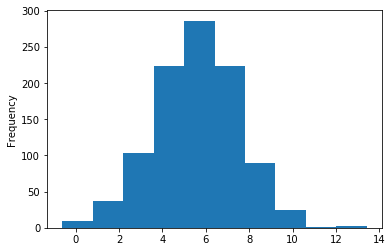

In [23]:
df['heights'].plot(kind='hist')
plt.show()

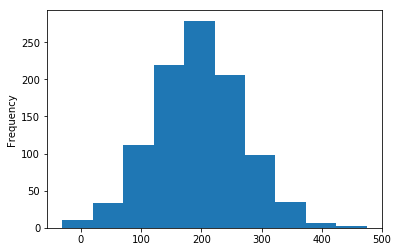

In [24]:
df['weights'].plot(kind='hist')
plt.show()

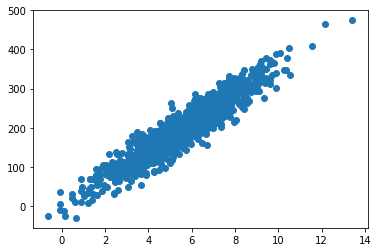

In [27]:
plt.scatter(x=df.heights, y=df.weights)
plt.show()

In [46]:
# data prep
import statsmodels.regression.linear_model as sm
from io import StringIO
np.random.seed(123)
df_string = ',y,Intercept,X1,X2\n0,1.7286290908472934,1.0,0.417022004702574,0.7203244934421581\n1,2.0264978373579345,1.0,0.00011437481734488664,0.30233257263183977\n2,1.581356788949401,1.0,0.14675589081711304,0.0923385947687978\n3,1.3313098419850122,1.0,0.1862602113776709,0.34556072704304774\n4,1.3671545533822478,1.0,0.39676747423066994,0.538816734003357\n5,1.6659350520283858,1.0,0.4191945144032948,0.6852195003967595\n6,2.2989108061768073,1.0,0.20445224973151743,0.8781174363909454\n7,1.5060355629804159,1.0,0.027387593197926163,0.6704675101784022\n8,1.5805908911824214,1.0,0.41730480236712697,0.5586898284457517\n9,1.3726453786816668,1.0,0.14038693859523377,0.1981014890848788\n10,1.853483848479116,1.0,0.8007445686755367,0.9682615757193975\n11,1.9923157051874596,1.0,0.31342417815924284,0.6923226156693141\n12,1.433668665906121,1.0,0.8763891522960383,0.8946066635038473\n13,1.181127785925888,1.0,0.08504421136977791,0.03905478323288236\n14,1.4212455022612773,1.0,0.1698304195645689,0.8781425034294131\n15,1.3600286600065625,1.0,0.0983468338330501,0.42110762500505217\n16,1.0600387275406398,1.0,0.9578895301505019,0.5331652849730171\n17,1.4106081764370053,1.0,0.6918771139504734,0.31551563100606295\n18,1.94714586938233,1.0,0.6865009276815837,0.8346256718973729\n19,1.4941589576458743,1.0,0.018288277344191806,0.7501443149449675\n20,1.8378410244515684,1.0,0.9888610889064947,0.7481656543798394\n21,1.9375885120476881,1.0,0.2804439920644052,0.7892793284514885\n22,1.914297995477512,1.0,0.10322600657764203,0.44789352617590517\n23,1.6753901085612823,1.0,0.9085955030930956,0.2936141483736795\n24,1.3372273893841067,1.0,0.28777533858634874,0.13002857211827767\n25,1.8613177534306988,1.0,0.019366957870297075,0.678835532939891\n26,1.7061722218818023,1.0,0.21162811600005904,0.2655466593722262\n27,1.2937698355083624,1.0,0.4915731592803383,0.053362545117080384\n28,1.0854178293677341,1.0,0.5741176054920131,0.14672857490581015\n29,1.1606110842888628,1.0,0.5893055369032842,0.6997583600209312\n30,1.440792925218016,1.0,0.10233442882782584,0.4140559878195683\n31,1.6287424041873368,1.0,0.6944001577277451,0.41417926952690265\n32,1.8837541779365583,1.0,0.04995345894608716,0.5358964059155116\n33,1.7268779366224525,1.0,0.6637946452197888,0.5148891120583086\n34,1.3381006742260164,1.0,0.9445947559908133,0.5865550405019929\n35,0.8491364162755121,1.0,0.9034019152878835,0.13747470414623753\n36,1.9620193977112854,1.0,0.13927634725075855,0.8073912887095238\n37,1.187844170088003,1.0,0.3976768369855336,0.16535419711693278\n38,0.7396573846167573,1.0,0.9275085803960339,0.34776585974550656\n39,1.8909241179240235,1.0,0.7508121031361555,0.7259979853504515\n40,1.2905526267276848,1.0,0.8833060912058098,0.6236722070556089\n41,1.225108734399965,1.0,0.7509424340273372,0.34889834197784253\n42,2.054230898547379,1.0,0.2699278917650261,0.8958862181960668\n43,2.216832832944339,1.0,0.4280911898712949,0.9648400471483856\n44,1.0516426392408003,1.0,0.6634414978184481,0.6216957202091218\n45,1.5900727310091227,1.0,0.11474597295337519,0.9494892587070712\n46,1.3865962295863064,1.0,0.4499121334799405,0.5783896143871318\n47,1.1628693350710724,1.0,0.40813680276128117,0.2370269802430277\n48,1.330644964416209,1.0,0.9033795205622538,0.5736794866722859\n49,2.131596904092466,1.0,0.00287032703115897,0.6171449136207239\n50,1.9541790151849325,1.0,0.32664490177209615,0.5270581022576093\n51,1.3314937724045643,1.0,0.8859420993107745,0.35726976000249977\n52,1.0975862162670684,1.0,0.9085351509197992,0.6233601157918027\n53,1.643300683721288,1.0,0.015821242846556283,0.9294372337437613\n54,1.8966034788693173,1.0,0.690896917516924,0.9973228504514805\n55,1.2196116782853221,1.0,0.17234050834532855,0.13713574962887776\n56,1.421602240152918,1.0,0.9325954630371636,0.6968181614899002\n57,2.0940122270673935,1.0,0.06600017272206249,0.7554630526024664\n58,1.3128232781580045,1.0,0.7538761884612464,0.9230245355464833\n59,0.8808742892445904,1.0,0.7115247586284718,0.1242709619721647\n60,1.0429011130948131,1.0,0.01988013383979559,0.026210986877719278\n61,1.2565211274910733,1.0,0.028306488020794607,0.2462110676030459\n62,1.6908404647763733,1.0,0.860027948682888,0.5388310643416528\n63,1.2492403685818783,1.0,0.5528219786857659,0.8420308923596057\n64,1.3011502274729319,1.0,0.12417331511991114,0.2791836790111395\n65,1.2246754381766705,1.0,0.5857592714582879,0.9695957483196745\n66,1.405165170509895,1.0,0.56103021925571,0.01864728937294302\n67,0.9478739420449217,1.0,0.8006326726806163,0.23297427384102043\n68,1.2039694420244607,1.0,0.8071051956187791,0.38786064406417176\n69,1.081091065412605,1.0,0.8635418545594287,0.7471216427371846\n70,1.1673247834466396,1.0,0.5562402339904189,0.13645522566068502\n71,1.4551503493538782,1.0,0.05991768951221166,0.12134345574073735\n72,1.5044360771406788,1.0,0.044551878544761725,0.1074941291060929\n73,1.666481633926024,1.0,0.2257093386078547,0.7129889803826767\n74,0.8291760629266511,1.0,0.5597169820541424,0.012555980159115854\n75,2.220231291786937,1.0,0.07197427968948678,0.967276330000272\n76,0.9548023898604356,1.0,0.5681004619199421,0.20329323466099047\n77,1.6700424290781968,1.0,0.2523257445703234,0.7438258540750929\n78,1.4649208355347487,1.0,0.1954294811093188,0.5813589272732578\n79,1.2394123492807676,1.0,0.9700199890883123,0.8468288014900353\n80,1.7993817501470044,1.0,0.23984775914758616,0.49376971426872995\n81,1.622299314397814,1.0,0.6199557183813798,0.8289808995501787\n82,1.120979454245603,1.0,0.15679139464608427,0.018576202177409518\n83,1.6772959234422817,1.0,0.07002214371922233,0.4863451109370318\n84,1.320801856512879,1.0,0.6063294616533303,0.5688514370864813\n85,2.0401240707932704,1.0,0.31736240932216075,0.9886161544124489\n86,1.1262931791214257,1.0,0.5797452192457969,0.3801411726235504\n87,1.942181243252648,1.0,0.5509482191178968,0.7453344309065021\n88,1.3240729969964429,1.0,0.6692328934531846,0.2649195576628094\n89,1.6524942546659214,1.0,0.06633483442844157,0.3700841979141063\n90,1.0439140583343176,1.0,0.6297175070215645,0.2101740099148396\n91,0.8430461335443145,1.0,0.7527555537388139,0.06653648135411494\n92,1.744038795319999,1.0,0.26031509857854096,0.8047545637433454\n93,2.2048377169535636,1.0,0.19343428262332774,0.6394608808799401\n94,1.3329750682996355,1.0,0.5246703091237337,0.9248079703993507\n95,1.1847945925265135,1.0,0.263296770487111,0.06596109068402378\n96,1.8191972074107448,1.0,0.7350659632886695,0.7721780295432468\n97,1.6768550068574115,1.0,0.907815852503524,0.9319720691968373\n98,1.3889636652663486,1.0,0.013951572975597015,0.2343620861214205\n99,1.4807665886180912,1.0,0.6167783570016576,0.9490163206876164\n100,1.2231867888759673,1.0,0.9501761192470797,0.5566531881951564\n101,1.4657666918323278,1.0,0.9156063497662745,0.6415662089463375\n102,1.7673302436989071,1.0,0.39000771414124624,0.48599066709690975\n103,1.8299190527455254,1.0,0.6043104829199732,0.5495479215085626\n104,1.677387474921986,1.0,0.9261814267064536,0.9187334356336061\n105,1.5211755222302767,1.0,0.3948756129235549,0.9632625284407118\n106,1.9019074617158465,1.0,0.17395566668046436,0.12632951943963733\n107,1.9664869044908486,1.0,0.13507915804673132,0.5056621656768967\n108,1.7706041833995858,1.0,0.021524805274197978,0.947970211217681\n109,0.8989173964277581,1.0,0.8271154711707325,0.015018980742122379\n110,1.9591019778247953,1.0,0.17619625557505525,0.332063574366837\n111,1.4653254040550312,1.0,0.1309968448109169,0.8094906921265821\n112,1.9311462490607627,1.0,0.34473665268329345,0.9401074823333672\n113,1.4261216347058063,1.0,0.58201417994708,0.8788319844118441\n114,1.8575292617975196,1.0,0.8447344453922219,0.9053923187086492\n115,1.4077567226576715,1.0,0.45988026581680697,0.5463468160203733\n116,1.4769237247598883,1.0,0.7986035911520394,0.28571885173414757\n117,1.246846282926714,1.0,0.4902535226199277,0.5991103076458784\n118,1.7704199638636402,1.0,0.015533275550835723,0.5934814081966372\n119,1.9904367163787187,1.0,0.4336763489894583,0.8073605288848414\n120,1.6858101643872632,1.0,0.31524480309537295,0.8928887085251513\n121,0.9646505330275548,1.0,0.5778572152845355,0.18401020162746506\n122,1.561033194258362,1.0,0.7879292338255043,0.6120311770449339\n123,1.936468009858082,1.0,0.053909272073752956,0.4201936800011322\n124,1.3999591060791419,1.0,0.6790688365654296,0.9186017779775258\n125,1.9395404233022528,1.0,0.00040202489135743313,0.9767591490310596\n126,2.199050524192339,1.0,0.37658031474577447,0.9737835383583225\n127,1.9840504846942384,1.0,0.604716100974053,0.828845807980693\n128,1.7338699565838065,1.0,0.5747115047081023,0.6280761983073504\n129,1.7415291289706012,1.0,0.28557628169569393,0.586833340656083\n130,1.8715283067603168,1.0,0.7500217637026599,0.8583138364290424\n131,1.8791321760896502,1.0,0.7550821884676802,0.698057248447303\n132,0.7316083430589966,1.0,0.8644794300545998,0.32268099683674645\n133,1.2872703390466427,1.0,0.6707887907875872,0.45087393641334916\n134,1.575763982663816,1.0,0.3821027520315172,0.4108113499221856\n135,1.6918753175292447,1.0,0.4014795834695406,0.3173839459582769\n136,0.991636713635525,1.0,0.6219193679203014,0.43024727082126435\n137,1.251754394434394,1.0,0.9738020779272523,0.6778008914343111\n138,1.3936867399103097,1.0,0.19856988842711087,0.4267010093480328\n139,1.6506563351972547,1.0,0.343346239774423,0.7976388039585666\n140,1.5099004663047584,1.0,0.8799982885634318,0.903841955826372\n141,1.4637594483532987,1.0,0.6627198123752622,0.2702082620297578\n142,1.7975017595666853,1.0,0.25236670150458973,0.8548979426974024\n143,1.7576914194531161,1.0,0.5277146463087466,0.8021610840045981\n144,1.662766865937175,1.0,0.5724885171916063,0.7331425252875111\n145,1.5542685395577727,1.0,0.5190116274640558,0.770883910501888\n146,0.9534023086548981,1.0,0.5688579907047155,0.4657098785919809\n147,1.0572766340913131,1.0,0.3426889079532818,0.06820934841670412\n148,1.1710576034713651,1.0,0.37792417932809985,0.07962607769825236\n149,0.7463759946550907,1.0,0.982817113730445,0.18161285133076377\n150,1.6302153552241148,1.0,0.8118586977205398,0.8749616449558981\n151,1.5520400568393184,1.0,0.6884132523859433,0.5694944127453757\n152,1.6530475525707784,1.0,0.16097143681560877,0.4668800227633063\n153,1.2607828549302993,1.0,0.345172051155215,0.2250399578140846\n154,1.5131370364925145,1.0,0.5925118687657968,0.31226983770191696\n155,1.1869484684206468,1.0,0.9163055534683507,0.9096355249515571\n156,0.9327674849255448,1.0,0.2571182937821962,0.1108913007440292\n157,1.888252738013848,1.0,0.19296273201911285,0.49958417067888605\n158,1.1833082271210327,1.0,0.7285856679745962,0.20819443840879148\n159,1.9996608143294166,1.0,0.24803355837723073,0.851671874936367\n160,1.2854615240808305,1.0,0.41584871826752734,0.6166850671552362\n161,0.9967703620771892,1.0,0.23366613923925006,0.10196725942579743\n162,1.3587505718236477,1.0,0.5158570169685298,0.47714098704978236\n163,1.93056380426912,1.0,0.15267164409316325,0.6218062317404155\n164,1.1578819815327188,1.0,0.5440101188139381,0.6541373469707443\n165,1.4993253721802846,1.0,0.1445455401246598,0.7515278171352439\n166,1.602603992689575,1.0,0.2220491397999227,0.519351824366033\n167,1.2396663895787396,1.0,0.7852960282216189,0.02233042799180618\n168,2.024404206405947,1.0,0.3243624597261865,0.872922376400111\n169,0.9566005137818937,1.0,0.8447096076020696,0.5384405925945437\n170,1.6662224657491977,1.0,0.866608274166513,0.9498059913536265\n171,1.4012147452480797,1.0,0.8264069976293413,0.8541154438365387\n172,1.9463708340081283,1.0,0.09874340182034835,0.651304332340991\n173,1.15692228990889,1.0,0.703516988152653,0.6102408126466297\n174,1.1453967765985342,1.0,0.799615261736028,0.03457121987163425\n175,1.1529074880482062,1.0,0.7702387345549799,0.731728600739527\n176,1.017366458758272,1.0,0.2596983932983531,0.2570692988221467\n177,1.343447318504434,1.0,0.6323033174301278,0.34529746159108154\n178,1.008956553558978,1.0,0.7965886780072875,0.44614623200345727\n179,1.7422045144232219,1.0,0.7827494147841719,0.9904717836238407\n180,1.4579535637025327,1.0,0.30024833953390007,0.14300582825809938\n181,1.5950708512667955,1.0,0.9013084363492738,0.5415593788873733\n182,1.2238919172076106,1.0,0.9747403708550822,0.6366044000018972\n183,1.7655310206024892,1.0,0.9939130246104789,0.5460708041429516\n184,1.319715680745398,1.0,0.5264259339055213,0.1354279030721699\n185,1.3140800993417177,1.0,0.3557051709838811,0.026218567296373285\n186,2.042063477346093,1.0,0.1603951795196491,0.7456371927074961\n187,1.740759996949893,1.0,0.03039968992878883,0.36654309724374434\n188,1.2776310496346805,1.0,0.8623462528380441,0.6926777175073543\n189,1.2380921149047133,1.0,0.6909421420661686,0.18863680095531088\n190,1.2589749382367839,1.0,0.44190428074842336,0.5815774073442912\n191,1.0006606730815704,1.0,0.9897517076637052,0.20390622523312185\n192,1.0371818435293272,1.0,0.24773290176235485,0.26217308377291193\n193,1.315930517411053,1.0,0.7501724132979928,0.4569753274356928\n194,1.5002675139031432,1.0,0.05692943841109499,0.5085162406102396\n195,1.820037900416883,1.0,0.21196016464367595,0.7986042447602102\n196,0.8944094366267282,1.0,0.29733138150727223,0.02760601195450363\n197,1.6802907562554585,1.0,0.593432449464621,0.8438404289311888\n198,1.477418976960322,1.0,0.3810161240622142,0.7498583107261434\n199,1.5923958443460777,1.0,0.5111414782971282,0.5409518049621886\n200,1.6550331384798138,1.0,0.9594343210617524,0.8039608914986468\n201,1.7788699191002981,1.0,0.03232306662357398,0.7093872512312951\n202,1.9044305527977625,1.0,0.46500148156350607,0.9475489413950998\n203,1.2617295975506508,1.0,0.2214327343234883,0.2670720196843658\n204,2.1721715204797425,1.0,0.081473964877262,0.42861882866378653\n205,1.5052625199161924,1.0,0.10901876401906829,0.6337867606119179\n206,1.8877470437547452,1.0,0.8029632373737379,0.6968004961201785\n207,1.0053411197748927,1.0,0.7662113810757705,0.3424541198435198\n208,1.28902303059095,1.0,0.8458514830276777,0.42876877499944255\n209,1.7224201089987232,1.0,0.8240098704123188,0.6264961586242938\n210,1.6840699723870856,1.0,0.1434230486702449,0.07838689985494796\n211,1.7297765894838437,1.0,0.01833264291300729,0.06672499763935646\n212,1.2678196145052973,1.0,0.4585838137084318,0.11334192276759048\n213,2.117714091726058,1.0,0.027783348848669953,0.7548614813904674\n214,2.095997584588302,1.0,0.3948504804606394,0.7469384956075251\n215,1.4401927054429926,1.0,0.45240482674645155,0.4500867470007611\n216,1.5259311940768825,1.0,0.47807250671783097,0.47400392656219403\n217,0.8656501728884205,1.0,0.8031633421141696,0.40239251985773583\n218,0.956960517475899,1.0,0.904686160343623,0.037061047954035864\n219,1.143122085541906,1.0,0.7738743427204187,0.12564138113773882\n220,1.5910630580151466,1.0,0.6185135669120855,0.010364261335231939\n221,0.842752777277066,1.0,0.538627282576347,0.0030179566195963625\n222,1.7082417273052535,1.0,0.9511937854902045,0.905402033702778\n223,1.6051248575349786,1.0,0.7959669419422694,0.9152743199147875\n224,1.6126213498726116,1.0,0.14555823115839706,0.15773006987053328\n225,1.247215058828304,1.0,0.187631672902434,0.6224959022999211\n226,1.1888202209361656,1.0,0.9058094960083019,0.9899551783590737\n227,1.2943222006544248,1.0,0.7111224587658159,0.7318004091422953\n228,0.7506623118670394,1.0,0.9092932045442544,0.4008737323711209\n229,1.63094754307818,1.0,0.24985068022503676,0.17343017078712286\n230,2.2168347177721484,1.0,0.119457050333729,0.8126105880328287\n231,1.6057208639260696,1.0,0.14679237341724316,0.2642974827269007\n232,1.2889130840995433,1.0,0.8190891786335308,0.31058725179421\n233,1.2578365550423836,1.0,0.9824174492929428,0.2666387021516352\n234,1.1925883335231233,1.0,0.5336533449712114,0.31446701118584963\n235,1.0946238879996402,1.0,0.9107728311738374,0.36655664385123443\n236,1.614289909780365,1.0,0.43359232727316455,0.5122926922783614\n237,1.3552478481680632,1.0,0.9388864773697133,0.030949006271150714\n238,1.288666779738496,1.0,0.7168786636316892,0.8910189542923389\n239,1.5749060677158102,1.0,0.027287223517468817,0.5220512472525107\n240,2.009671004937477,1.0,0.3259898117700253,0.8594893208655858\n241,1.4067759077524569,1.0,0.5585165509225178,0.6902278681627478\n242,1.135338697491465,1.0,0.45285349995153745,0.6283090375213571\n243,1.0159827918157966,1.0,0.2900968516874258,0.009348577966515781\n244,1.0612089992322327,1.0,0.5767559349870908,0.3114442141324628\n245,1.6946814898375622,1.0,0.5172675985011298,0.9164058530538978\n246,1.5455855851418328,1.0,0.426474788501396,0.2473960366023854\n247,2.160503654897326,1.0,0.37129376127905445,0.9318611166365406\n248,1.8562673400505547,1.0,0.9368683813090937,0.8443299485657132\n249,0.9610076563079232,1.0,0.9202065143056605,0.22790028995131695\n250,1.8232938364911346,1.0,0.08748220955359087,0.22730973628468876\n251,1.2126226606801032,1.0,0.31437661611405043,0.17476587635631158\n252,1.2718229962796266,1.0,0.6070941619724605,0.41358641500116133\n253,0.9771160053140385,1.0,0.8163515118272141,0.18513039826903066\n254,1.1829302837455156,1.0,0.7018765297563104,0.24035562484913886\n255,1.1020999498583453,1.0,0.5742190888408597,0.34898759722078887\n256,1.4049106422089606,1.0,0.05696439948283272,0.22881367096037586\n257,1.0384935828929565,1.0,0.6641025553547935,0.4972500933605313\n258,1.7908703226131566,1.0,0.5190159840736788,0.1747201501089225\n259,1.7170017962297597,1.0,0.5707158515462564,0.99675342520821\n260,1.8118694401083417,1.0,0.8168351087916219,0.5943726238309778\n261,1.7089468989426293,1.0,0.9759890683309049,0.9015625846693213\n262,1.1761144835363249,1.0,0.5956079336026455,0.032426325314457105\n263,1.7405195349205045,1.0,0.09357709581748075,0.06537171504222639\n264,1.5898739208451171,1.0,0.4517331486914753,0.37543483316785775\n265,0.9000750636165329,1.0,0.9753500342702865,0.1679832931996149\n266,1.4190029518784508,1.0,0.9727875919326552,0.7674748688630131\n267,1.616501184224179,1.0,0.8242378396244978,0.6326158167779973\n268,1.2093883131055374,1.0,0.668732770206732,0.47688233352119336\n269,1.1824577011958497,1.0,0.013136356923072245,0.3530060855418248\n270,1.3872725339342094,1.0,0.49207180149355845,0.7300912110901043\n271,1.7911337622617456,1.0,0.4686283427461092,0.4574049160894317\n272,1.866606085392439,1.0,0.13766274094560316,0.01088873380347899\n273,1.4061684437035962,1.0,0.7582782604769962,0.3199528380776784\n274,0.7507328725632336,1.0,0.9843834501935107,0.220234226159156\n275,1.8501644143396472,1.0,0.33870802548167966,0.5238961356661317\n276,1.3813885094672256,1.0,0.7548914570605327,0.46385778390029564\n277,1.8477084893113997,1.0,0.12482254311167629,0.3125013784920495\n278,1.9432766222279492,1.0,0.5045191697009946,0.6738490080168676\n279,1.6276344634229551,1.0,0.7701499563120922,0.13033578095435427\n280,1.9026211300676354,1.0,0.022915131322381765,0.5190823222119895\n281,1.4555657380263767,1.0,0.8099887106624163,0.012603767029876312\n282,1.7497572486981756,1.0,0.6724698446537339,0.6868082266569918\n283,1.9598721549813252,1.0,0.44924675358663757,0.9147886867419343\n284,1.5392301327142013,1.0,0.6443610847569929,0.005239837651465851\n285,2.1104477210452774,1.0,0.4844284455143756,0.8593178060976\n286,1.8114533150624137,1.0,0.8303995700373394,0.6491541971124779\n287,1.348150839510465,1.0,0.6736984238986317,0.5784995797892005\n288,1.2272263874833285,1.0,0.27411977516685215,0.5605299905360588\n289,1.6699236411576432,1.0,0.6717297848174203,0.35242963021640883\n290,1.208536112685024,1.0,0.8558283672539277,0.1950374860087073\n291,1.3132171226666003,1.0,0.7473208103319232,0.2896027461868774\n292,1.6521443516123666,1.0,0.773799287244182,0.4277373293360762\n293,0.8049024111536643,1.0,0.8076984091122095,0.3535348626679904\n294,2.1547560541212496,1.0,0.21369323762958115,0.7672845084217665\n295,1.2469355613856083,1.0,0.3086419476306511,0.7332450677264275\n296,1.4316563322936227,1.0,0.7444731530777321,0.22139670090820107\n297,1.5799023726536183,1.0,0.21411213682064845,0.1989479234270667\n298,1.7590313115543414,1.0,0.14251833776584466,0.3770825992073341\n299,1.4162264299095657,1.0,0.026627884691621473,0.11092036903424063\n300,1.3380682832170918,1.0,0.6745640237634105,0.7997765368973863\n301,1.5849949731174655,1.0,0.0805295271283859,0.23170231048579204\n302,2.2406770677886296,1.0,0.20762566180381437,0.9173335630816306\n303,1.486574716823032,1.0,0.7113145181364867,0.5538846110514143\n304,1.9283169213199058,1.0,0.30451798792062024,0.8348540476317985\n305,1.6854543596981286,1.0,0.43530595762951996,0.9234562151187752\n306,1.8581288389361272,1.0,0.7060518043359332,0.47803130796528337\n307,2.1674391757109044,1.0,0.1262101037493587,0.9760435504677476\n308,1.3762867482885581,1.0,0.15983365034409336,0.2026021252196626\n309,1.6400411079710475,1.0,0.43118175516037094,0.40420190577514725\n310,1.833900131170135,1.0,0.14675148076429412,0.7293189193611234\n311,2.1116315010959243,1.0,0.18874506687718595,0.6438956443116628\n312,1.0032672718189226,1.0,0.7543059505762987,0.21073239208332073\n313,1.1820545487414356,1.0,0.60095424810764,0.7489283752458364\n314,1.170726347904328,1.0,0.6382187106203334,0.5971273029466491\n315,1.6051083253980918,1.0,0.29548228565549706,0.7316064712415088\n316,1.594186270065113,1.0,0.9453084399999497,0.42556139026154693\n317,0.9078245252511716,1.0,0.7821818168314053,0.056141039661915304\n318,1.3048480103747746,1.0,0.8352716024899659,0.1922500168221477\n319,1.57604388956325,1.0,0.3950968688899732,0.30008104592535645\n320,1.8203108149130256,1.0,0.08010364380604929,0.9046310029362429\n321,1.1306067601206524,1.0,0.37015417755373825,0.5306974384761395\n322,1.5638563110557993,1.0,0.49411626589632507,0.13216114194293815\n323,1.2305929094953252,1.0,0.20645405888943302,0.07618880903232117\n324,1.2752721224928898,1.0,0.5079216999452875,0.2615495518329871\n325,1.2527414274377318,1.0,0.3570616088827919,0.10806532869723684\n326,1.3231186502392407,1.0,0.7875518396525072,0.1065838767888011\n327,0.6820594571777789,1.0,0.9857088237131878,0.17716116443841734\n328,1.2861100315492004,1.0,0.5724051124346493,0.044845334589088126\n329,0.716666651424487,1.0,0.7871162896558341,0.18960594781829654\n330,2.089125765914889,1.0,0.5279039784081266,0.7400775431590716\n331,1.7990050670228728,1.0,0.14993148491725594,0.5510871741869717\n332,1.6554036484904093,1.0,0.2166172083287794,0.7591960493171447\n333,0.8735648510879174,1.0,0.7229151935562137,0.17654903427708302\n334,1.2757825973614407,1.0,0.8619665576670734,0.019775099516344263\n335,1.7551418235754639,1.0,0.8602369974231152,0.5589038111609383\n336,1.4958719818028605,1.0,0.4032204721058492,0.7587469310223366\n337,1.9016907312142082,1.0,0.7169290016924699,0.9873261748084265\n338,1.1503524139393675,1.0,0.2780850486129828,0.0037936724093425855\n339,1.9192225904858964,1.0,0.9339026083148878,0.8578971045378938\n340,1.5962347074959489,1.0,0.7288508775192559,0.5166887829215384\n341,1.6618022490073119,1.0,0.706956245248761,0.7805295568767427\n342,2.128458024046697,1.0,0.3748759435368594,0.7703225253299576\n343,1.2003358334364607,1.0,0.7506243191751754,0.6132112115442597\n344,2.0713367939890124,1.0,0.4018659239678374,0.6973080192643409\n345,2.063974828573685,1.0,0.0031128578251921057,0.7748966467245978\n346,1.4428120596917906,1.0,0.896416602456847,0.23931570743750463\n347,1.6213937381772003,1.0,0.12076718430922972,0.2202839877937276\n348,2.124370566136101,1.0,0.3020967312900983,0.8830285085638342\n349,1.5700544089760307,1.0,0.5431664302380945,0.2867116496064306\n350,1.2225035884327067,1.0,0.13835468979294652,0.29014446310454167\n351,1.4675948487061719,1.0,0.6138710897412526,0.3241385298974466\n352,1.2726987982791398,1.0,0.45736018169099846,0.44411710701661444\n353,1.7149851198196595,1.0,0.8281353607315121,0.4263481542362306\n354,1.362868682026955,1.0,0.3456988211755023,0.6749716048091052\n355,1.4085983794678154,1.0,0.22148205573352875,0.4672458239265538\n356,1.203699662389088,1.0,0.31476568732401644,0.6268556021628346\n357,1.2327434067760459,1.0,0.8773604746948126,0.4476890001456285\n358,1.3938419560559254,1.0,0.7844574187919231,0.4569657005615504\n359,1.3113669042322806,1.0,0.6562293317171314,0.13184097502750214\n360,2.1435426208033173,1.0,0.43298150696764814,0.9093119886549367\n361,1.4280617259036887,1.0,0.6054790010309347,0.7667745872371021\n362,1.4442058879573119,1.0,0.5047006080958943,0.49805562482800747\n363,1.4636912095755492,1.0,0.8428998401928499,0.06780693434095375\n364,1.7615744551736572,1.0,0.5732722715496846,0.9427625754329493\n365,1.492295815555515,1.0,0.5178600481723219,0.1944658095278845\n366,0.9802092053505044,1.0,0.8479393924434762,0.25163914235585283\n367,1.4072387535830302,1.0,0.700726036482538,0.5402609403968999\n368,1.4587025946417005,1.0,0.9488362882802196,0.6243367024026759\n369,0.7183714872186368,1.0,0.8379779620477293,0.007932876194523097\n370,0.5770959736754088,1.0,0.989340056166638,0.07771457033238649\n371,1.4254224420518238,1.0,0.3221295136147696,0.9461523954567653\n372,1.8843565278649983,1.0,0.008939102371245067,0.8227300054219355\n373,0.8133363225516975,1.0,0.8612116383667944,0.4398308142085725\n374,1.8996810920509055,1.0,0.2557451938059312,0.8026895196332986\n375,0.9258209200878219,1.0,0.47786200443222115,0.13433860865569613\n376,1.2350220248070647,1.0,0.9278489928250108,0.8959699670066484\n377,1.609071619106647,1.0,0.49154515001693533,0.8567024965177922\n378,1.2482701839073505,1.0,0.41857802576409864,0.6834649001663011\n379,1.3244276828189103,1.0,0.39799063940792245,0.5057420174508104\n380,1.4087982834740047,1.0,0.1895517028339273,0.9649889241109139\n381,1.8896674875465427,1.0,0.2942156882442547,0.10345955611640134\n382,1.5464620551031079,1.0,0.1443154002290481,0.014092294192442956\n383,1.302630149224489,1.0,0.7159456994623945,0.5644983202408741\n384,0.8827791371601413,1.0,0.7945783511847522,0.5070799232841364\n385,1.3418103357588271,1.0,0.7918210395041538,0.6957642142718394\n386,1.2668758224453898,1.0,0.7778484768591754,0.4064828689770863\n387,1.6970150260172496,1.0,0.6477706331874812,0.1797942976929744\n388,1.2038965002040007,1.0,0.321819963387904,0.1726046201197925\n389,1.531172652559467,1.0,0.4086372250132624,0.2414187479655988\n390,1.9493185287361703,1.0,0.4069219941293579,0.9752223424373121\n391,1.5170467793727709,1.0,0.32031932582203126,0.9824909449748953\n392,1.3751557952553957,1.0,0.6363061258559836,0.375091018393911\n393,1.6675518830024236,1.0,0.8574844990835966,0.6195867393685738\n394,1.366990333351438,1.0,0.25203308013083936,0.7928556779768876\n395,1.5683216274671015,1.0,0.43293850873416306,0.3575111673304414\n396,1.2096059022324224,1.0,0.33027693652508094,0.6973688756131394\n397,1.2768606687096522,1.0,0.26865012390622656,0.8082780137053801\n398,1.183944901732826,1.0,0.2952887943998478,0.5441213835853572\n399,1.6651179195441201,1.0,0.4879214918052024,0.8553564125953698\n400,1.5737031126764212,1.0,0.8883864343953859,0.18438444236776674\n401,1.561985677678467,1.0,0.585348458938251,0.8982050460171371\n402,1.3129081825612336,1.0,0.4461172190344297,0.9218683054838154\n403,2.0262726163514415,1.0,0.2789908904569709,0.6088311741937957\n404,1.2921735972622748,1.0,0.6824537097668154,0.2282057333504841\n405,1.5204140938239137,1.0,0.013767512557716799,0.4167239623706961\n406,1.665305447771512,1.0,0.938481891856734,0.34302810983040655\n407,1.6357577771747822,1.0,0.7797442954825999,0.17473631282740743\n408,1.1613414142245144,1.0,0.34195283630245243,0.14459772083809674\n409,1.1926602584889394,1.0,0.716770814146376,0.6993076236968142\n410,1.3713580615747678,1.0,0.6884973179489188,0.25339603448629966\n411,1.6099869194878291,1.0,0.6923601216234089,0.22729754091594956\n412,1.3103575926132285,1.0,0.4246491159313397,0.37192212166768723\n413,1.4376028692748286,1.0,0.3553079116201222,0.05765480724125638\n414,1.2000799873866879,1.0,0.6316466268659396,0.7073166026816995\n415,1.2119557660682863,1.0,0.6135886945028356,0.6483127561631246\n416,1.751088258352898,1.0,0.16994071421725776,0.14944679893886248\n417,1.330677302766378,1.0,0.5141750435258828,0.8753327263545391\n418,1.4053498796283463,1.0,0.18395344154722204,0.4628391187082599\n419,1.7236732891224762,1.0,0.42893233402990294,0.4972891859195163\n420,1.1055542429573784,1.0,0.16151077048601192,0.34244064113481054\n421,1.32351767343155,1.0,0.2618804041035202,0.844526943229479\n422,1.1006793962698995,1.0,0.8003322457764017,0.4266391582681436\n423,1.1058482552508897,1.0,0.6070154607890389,0.14546561026621996\n424,1.2558830013146842,1.0,0.5096132942175586,0.29694708578690454\n425,1.713164289182114,1.0,0.8596509535692011,0.6715983809063899\n426,0.781619611382021,1.0,0.633474012622421,0.12475130006917923\n427,1.616387694669323,1.0,0.4705878794988857,0.9865727795868815\n428,1.4866713663607136,1.0,0.9482991740726651,0.6450856402604436\n429,1.3867050983622882,1.0,0.15172487103197363,0.639126848719905\n430,1.809240477070103,1.0,0.5656621125439275,0.468665837661252\n431,1.7311805513683125,1.0,0.42803746946827015,0.5992697556580301\n432,1.065869001408013,1.0,0.8499698885159654,0.7511210403719374\n433,1.3807692306183448,1.0,0.579360540297233,0.9247041815360281\n434,2.2088015933932947,1.0,0.06473998344154885,0.9913465087318091\n435,1.4766571300694586,1.0,0.05299454266798953,0.19949554613856135\n436,1.32684816821881,1.0,0.42275266164456093,0.10750887618516769\n437,1.5996161545983103,1.0,0.6236704109977018,0.047992564048867314\n438,1.0256499496805955,1.0,0.28462388100694214,0.06103668111967109\n439,1.946841215628318,1.0,0.7035193311050811,0.668456167589482\n440,0.9474365151861893,1.0,0.3785805932506022,0.1881942600298212\n441,0.8961274881226459,1.0,0.7470048290299451,0.34037929076546725\n442,1.0695383168274322,1.0,0.7953011674056428,0.4879009391796203\n443,1.557995784830808,1.0,0.5256694443509794,0.028490849491567216\n444,1.3090850486460701,1.0,0.6442320198790318,0.3506565024321674\n445,1.7555903167211369,1.0,0.2292050272920657,0.4338833762117006\n446,1.2179819289275584,1.0,0.3824674572709176,0.46978904008636024\n447,0.8591692910207402,1.0,0.9794833541798064,0.36437807036823044\n448,1.4100270721607155,1.0,0.7744101333360395,0.5527675965498925\n449,1.4732045163012661,1.0,0.8891310891074828,0.354952851149572\n450,1.795224744950259,1.0,0.24551868018650747,0.9110192396569683\n451,2.3232236672727313,1.0,0.04353426375776537,0.9507534280610023\n452,1.5703900851787214,1.0,0.5564069156709253,0.3763632166870875\n453,0.780745250356193,1.0,0.9950523223391111,0.05836264614763165\n454,0.9920975786460727,1.0,0.5167063597676121,0.03109707545554785\n455,1.1786931017715108,1.0,0.5711757391862334,0.18046850899511557\n456,1.9315982940017427,1.0,0.6309592003395305,0.9809236757505815\n457,1.726404513414027,1.0,0.8749025512123809,0.45183624942087064\n458,1.896409939294569,1.0,0.7084608700517172,0.7774687500031893\n459,1.2784559956804227,1.0,0.4948430841825636,0.5285334901775651\n460,1.5215866915984266,1.0,0.1507843983721926,0.36939992561190627\n461,1.9038803495862093,1.0,0.14222125307278666,0.7268937533445626\n462,1.5327673769680596,1.0,0.4770129944022632,0.44887883670676554\n463,1.2100853459820706,1.0,0.8859979711653513,0.5276187723115614\n464,1.0313213720291698,1.0,0.4090908319168599,0.26889202221264585\n465,1.8853068536750284,1.0,0.07201203516976995,0.4181361337253158\n466,1.2208353929983562,1.0,0.025753482406583372,0.29115394055242805\n467,2.0972892069593825,1.0,0.5035095098483965,0.9659330650197223\n468,2.1452775103441533,1.0,0.10938291419358459,0.673041054216622\n469,1.847033720603664,1.0,0.49993237109919997,0.777098229275783\n470,1.4562223930885194,1.0,0.14360699787420927,0.08320263643587555\n471,1.8980183887266397,1.0,0.3992186053524538,0.7969622519799001\n472,1.6830377867204571,1.0,0.1916757389098901,0.767777192147274\n473,1.7607927295683123,1.0,0.2902979970618682,0.21689148761179533\n474,1.9773888177025338,1.0,0.016715589077006432,0.3986590599223787\n475,1.294660306324578,1.0,0.38108149129345237,0.6593449361953647\n476,1.35866034363654,1.0,0.07091840047038722,0.15260398704227185\n477,1.3925934135592266,1.0,0.016575882900934147,0.11379635644740682\n478,1.2396040867359401,1.0,0.6517892760100904,0.4026568521749192\n479,1.685088396726127,1.0,0.32102631416731586,0.5579119942437725\n480,0.9622004679793776,1.0,0.9934604630998499,0.8344865140180296\n481,1.7692874223301363,1.0,0.6996231823995839,0.9182585891320579\n482,1.2169341265228546,1.0,0.03972870668308481,0.07033344161552524\n483,1.3540431176576195,1.0,0.4740062899880546,0.3491674129570773\n484,1.2270491060090598,1.0,0.9372520621284489,0.48956496114516856\n485,1.526532397366581,1.0,0.5396491100933506,0.8952603657312208\n486,1.598479981851343,1.0,0.4466350458236905,0.8770343892703519\n487,1.1904200382409995,1.0,0.25358174937162836,0.27380970415810857\n488,1.177731497590756,1.0,0.32836139008759013,0.5475642704809535\n489,1.7769068974629976,1.0,0.22012867402698122,0.6714291710812733\n490,1.5715204414649708,1.0,0.1427932828030004,0.09410027449963942\n491,0.8288382678975192,1.0,0.8701917462053776,0.23686870355699852\n492,1.3237107491734925,1.0,0.3860040110225955,0.5715420927253323\n493,1.0614880862827007,1.0,0.52580196995147,0.07602387944210687\n494,1.8692562083147577,1.0,0.8741259355980283,0.9511356184186921\n495,0.8890682065485136,1.0,0.8125073041746718,0.2838018349468743\n496,1.4579237715033064,1.0,0.5278467961179595,0.3394167240176095\n497,1.7780077967548604,1.0,0.5546673107876667,0.9744034689130026\n498,1.5219669372106166,1.0,0.3117029177189814,0.6687966059228697\n499,1.5748722186600006,1.0,0.3259672073089859,0.7744772660150796\n500,2.2411207049362876,1.0,0.3258099666132048,0.889827341447375\n501,1.5588061367224426,1.0,0.7517077209192669,0.7626320954451107\n502,1.5233739378553446,1.0,0.46947902855992574,0.21076450246870537\n503,1.630916976641286,1.0,0.041475079576498874,0.3218287999702445\n504,1.975021355111743,1.0,0.03711266449399442,0.6938554113738997\n505,1.4853116609114654,1.0,0.6703500319361684,0.430471782744975\n506,1.0292830514607911,1.0,0.767788977658173,0.5360084947395637\n507,1.3821471285472064,1.0,0.03985992663545257,0.13479311796067905\n508,1.5315576945337992,1.0,0.19341639901491836,0.3356638011646498\n509,1.4042235786378297,1.0,0.05231294643747675,0.6051167805003662\n510,1.415773315851117,1.0,0.5120610275239188,0.6174610120171561\n511,1.4358140710294691,1.0,0.43235559476434404,0.8477004682374377\n512,1.6281748341367868,1.0,0.4540590560591513,0.015403519791920894\n513,1.2330407796697984,1.0,0.8730681484470995,0.6562015477440989\n514,1.2911756468589553,1.0,0.823003040648471,0.9517756930338517\n515,1.5002611431393458,1.0,0.050912383516887205,0.23507186409101455\n516,1.8622212689103024,1.0,0.0633434434563398,0.4216578860324509\n517,0.674519417568233,1.0,0.863829145501452,0.0816239827150681\n518,1.0069447920644123,1.0,0.4731119528858785,0.12554310980872363\n519,1.7285752162380914,1.0,0.7728856021671178,0.8414221567958434\n520,1.9738315072962114,1.0,0.04329093818615859,0.48644074317039476\n521,1.9742856483878195,1.0,0.23941104413775594,0.9524737816932592\n522,1.714219247837048,1.0,0.9438926277837961,0.6139340023847009\n523,0.8544871632731209,1.0,0.9734873973251963,0.344861343716251\n524,1.4719198600718424,1.0,0.8978507176676818,0.4345949734085095\n525,2.269766822106951,1.0,0.23581463714751372,0.9408279632013994\n526,0.8410864262810092,1.0,0.6842180509832275,0.06491158533912933\n527,1.1592416963013212,1.0,0.8704248568230661,0.7013802946333463\n528,1.6104085851933287,1.0,0.6049268729742817,0.7323748991793305\n529,1.5176442933633791,1.0,0.2534390424997808,0.6004889552745444\n530,1.3103863203135664,1.0,0.8146191812616553,0.05411366032399989\n531,1.4135351877336813,1.0,0.13051067133926597,0.8424458099564136\n532,1.1172351129000462,1.0,0.6183458693278855,0.531287810481058\n533,1.73963222960582,1.0,0.2482907289970986,0.2950785752494959\n534,1.7451085833990674,1.0,0.8726861649194619,0.42166593484970927\n535,2.3458277834763286,1.0,0.0644302555796068,0.8969850695075825\n536,2.2124903447569837,1.0,0.20338083282405106,0.8262275354923914\n537,0.9302333747713587,1.0,0.8817706230828073,0.48675074481833813\n538,1.1103302997619937,1.0,0.5984646931046363,0.527267456485417\n539,1.187374970395799,1.0,0.624821294185499,0.8550417213473515\n540,1.8433482630326612,1.0,0.2821394484048606,0.8837555081806009\n541,1.6561925283262486,1.0,0.5676903301191493,0.11510304096690338\n542,1.7162825102660664,1.0,0.22700116521465796,0.5959823856130138\n543,1.72769999721233,1.0,0.23944623690468037,0.13141566053746057\n544,1.5299661889672134,1.0,0.16184771412383514,0.8448725182357391\n545,2.043802976814151,1.0,0.6021836538927108,0.9635670871883419\n546,1.3123977131448137,1.0,0.34567921329602547,0.5956250981349497\n547,1.0631236251817877,1.0,0.5989852889734197,0.6157042872039488\n548,1.7670609991225796,1.0,0.05917720718572239,0.7503171845746859\n549,1.3483392095044202,1.0,0.9482094981876252,0.5346790571795887\n550,2.2509269565338315,1.0,0.1925560209550684,0.7529259149799422\n551,1.2522224006026499,1.0,0.0073189693278638,0.32825610365078084\n552,1.1092985858542967,1.0,0.9176063476443932,0.5883673328938768\n553,0.9798479533045757,1.0,0.8551902839041353,0.6046720523491877\n554,1.4188923221903393,1.0,0.822578152523871,0.8794835234293169\n555,1.1899952817016324,1.0,0.3209863745244532,0.12295477155217849\n556,1.3728222207902403,1.0,0.7213033441865708,0.44034708683123824\n557,1.5798006512346872,1.0,0.1267357091420086,0.5898236481098892\n558,2.0102849191706644,1.0,0.03606831456985993,0.20018211641098693\n559,1.4018455815567348,1.0,0.7883011896679689,0.012096760015357866\n560,1.7200265133037265,1.0,0.3033456717085691,0.021375961088070716\n561,0.921773437750462,1.0,0.9974849927283295,0.5820299763434618\n562,1.8928567586922433,1.0,0.29337627848605663,0.9289494618931157\n563,1.18856893788696,1.0,0.5071194235482045,0.4546922275524069\n564,1.7063716403980806,1.0,0.5878715062961865,0.2641376442105696\n565,1.0482025604417986,1.0,0.3052882993474333,0.37165457672418245\n566,1.2757938485025617,1.0,0.24444799937161088,0.5845472661166298\n567,1.0641076186631528,1.0,0.6958461339323264,0.07194722016400112\n568,1.293087574215189,1.0,0.9710833196254638,0.7530706558694549\n569,1.2499587035426236,1.0,0.8061631629534083,0.7516404040812905\n570,1.2968806516349192,1.0,0.0800609772712173,0.48169628302117706\n571,1.2321302521742306,1.0,0.44567295640165605,0.6724726505249299\n572,1.4457328236271276,1.0,0.4487372588243219,0.7043133983839096\n573,1.9585444296527872,1.0,0.6816453376026229,0.6971485287527562\n574,0.9735965601783786,1.0,0.6186007425615364,0.15098073327964578\n575,1.757402004003323,1.0,0.760802456305756,0.781045822193957\n576,0.9230215173526346,1.0,0.9041029859138049,0.23376869260410593\n577,1.1444503706279954,1.0,0.17667889307234141,0.3910991231067624\n578,1.263508346672295,1.0,0.3205646539951602,0.8154769290056262\n579,1.225943857521835,1.0,0.6135258996684316,0.7600017523497489\n580,1.2979719246070547,1.0,0.4276650996969642,0.09944056291558923\n581,1.8850871573812795,1.0,0.11503501205024624,0.3734071317371953\n582,2.042264297501869,1.0,0.19384776750950716,0.8207464986229382\n583,1.3969940677805108,1.0,0.5996360084237168,0.688845259018665\n584,1.277671138731856,1.0,0.4911099613042962,0.08817368124218106\n585,1.927335975478391,1.0,0.23507763668617032,0.461602080891622\n586,1.7518452727414262,1.0,0.19859150305392625,0.0254762357788203\n587,1.317676224899469,1.0,0.7293976982561526,0.7249167472191191\n588,1.2608162082580834,1.0,0.33039174636170277,0.8434941260636555\n589,1.2650526776324629,1.0,0.42844247595107343,0.8646861447635343\n590,1.6997924940015845,1.0,0.6570654246228895,0.5810356574180902\n591,1.43704184229416,1.0,0.200727488035091,0.5295466104783949\n592,1.186766590890474,1.0,0.8944324184275724,0.30499397583521604\n593,1.2109310978798116,1.0,0.8709456091610533,0.9087452728583881\n594,2.0237278179095353,1.0,0.32984456268188234,0.6830743663365642\n595,1.0916155757327206,1.0,0.8992209495659688,0.07569688175830336\n596,1.1832859257541166,1.0,0.8785878632047704,0.1908393632684806\n597,1.1967545274263913,1.0,0.8497689100179306,0.6671187886992039\n598,1.4155174179352956,1.0,0.34433919545005387,0.151375569992799\n599,1.1081721864956642,1.0,0.6353709614884534,0.8477880437147416\n600,1.1804901515265338,1.0,0.8218493747640105,0.6282395971306578\n601,1.1655737921987046,1.0,0.9563015097552321,0.5899231270757698\n602,1.3996998552733224,1.0,0.1978327846479193,0.4293307226164923\n603,1.4135517341804749,1.0,0.3367459987011673,0.991945011907281\n604,1.828013398007835,1.0,0.38023649611726473,0.992700873664818\n605,1.6152168587453706,1.0,0.5188042507334142,0.17227970147712546\n606,2.0904642468693755,1.0,0.07457407125147986,0.37030569377388767\n607,1.7528397203552193,1.0,0.12341885981472989,0.6345187162918416\n608,1.882251751753464,1.0,0.4139198457294089,0.9909156325254501\n609,0.9005001421386867,1.0,0.9299556236533179,0.14923603230975002\n610,1.1825082331329817,1.0,0.3948822625368005,0.46157971096238615\n611,1.2415790748121025,1.0,0.5609487551219452,0.7803635232892685\n612,1.6987605973379662,1.0,0.48719390907342375,0.4199935520102408\n613,2.058872652533646,1.0,0.26199970471933565,0.9108061390867584\n614,1.5787752099797157,1.0,0.022271511532804156,0.8211218982189646\n615,1.6622046295288562,1.0,0.18846839966641848,0.6857568991725472\n616,1.9036459471692633,1.0,0.35520938933964374,0.9742126278950913\n617,1.1576808277700585,1.0,0.12277212944941995,0.18756989261723955\n618,1.6323508694407405,1.0,0.8894424754644789,0.5834063146082279\n619,1.4657512037299432,1.0,0.3092463846587796,0.0007643854781880233\n620,1.574124639432946,1.0,0.22759773832225305,0.1454036341712357\n621,2.0476524581355893,1.0,0.2034338243700906,0.8963225568040046\n622,1.9007806117482788,1.0,0.8730943782696405,0.7002894376334498\n623,1.7407136190472179,1.0,0.47049767615220905,0.8271360023322883\n624,1.7982474047981944,1.0,0.49582639708521237,0.36348868328490525\n625,1.7432775304459223,1.0,0.27560310276085875,0.9247408135383717\n626,1.7074151708149485,1.0,0.38698923425629217,0.49288087343132025\n627,2.240525396120587,1.0,0.2544381023144221,0.8849665188380633\n628,1.6213064448983694,1.0,0.38326345680528673,0.29757471531387525\n629,1.0397181664318427,1.0,0.7175949621947544,0.19086994317230743\n630,1.9793482702948668,1.0,0.11819262934703845,0.8369977822135122\n631,1.2745106334969836,1.0,0.7441359213695352,0.5905205476471171\n632,1.5125444602457763,1.0,0.24289157496487068,0.6232471451875841\n633,1.4548121204319462,1.0,0.638355320741173,0.32756944411232514\n634,1.5668478592367792,1.0,0.06748934306754228,0.8805385975643267\n635,1.6386969292538391,1.0,0.4599567310742584,0.7638727180664299\n636,2.11438356564878,1.0,0.2538886209427397,0.5913871822675169\n637,1.3605669830787088,1.0,0.4287951603487977,0.38210064254913956\n638,1.247739232926838,1.0,0.12671338384692277,0.24426666320897583\n639,1.5805973105218107,1.0,0.07934158295831895,0.3028583047175786\n640,1.7775632938232793,1.0,0.7417048002315554,0.6150157249710488\n641,1.5106537128905857,1.0,0.6724110989339258,0.00838307952503159\n642,1.7402050986050057,1.0,0.6783769722513199,0.503180690542887\n643,0.9834695418546849,1.0,0.23090845048417918,0.17489650898192222\n644,1.5966788296904295,1.0,0.18498296555082983,0.8442600050750985\n645,1.9654507053425356,1.0,0.9825897893050853,0.9137396248416316\n646,1.336110856851762,1.0,0.3473694203728128,0.7802245796913637\n647,1.625083399514887,1.0,0.5464545907014307,0.8164423975559377\n648,1.8431383241579342,1.0,0.48372695118890585,0.5899512982994037\n649,0.7786995078832917,1.0,0.7872634475242615,0.10023464310313235\n650,1.5768972956058045,1.0,0.5370071168405407,0.36598334666965426\n651,1.6653282815053883,1.0,0.6043068436688722,0.9588025156370005\n652,1.1943650085585138,1.0,0.39282294499696246,0.39297299794161644\n653,1.805850729330634,1.0,0.7906369935895988,0.6450783990854264\n654,1.329022917745168,1.0,0.3938840078553765,0.6889550482302514\n655,1.505108631891647,1.0,0.404001609054379,0.1361131542481221\n656,1.6827149402104982,1.0,0.45064326867213444,0.3344193926972726\n657,1.9165758223808642,1.0,0.2179689300611679,0.9257748016364399\n658,1.5834323143691231,1.0,0.6896393990795577,0.5988208906234219\n659,1.0166221914462228,1.0,0.746657472123005,0.5419710617714415\n660,1.4230503603697024,1.0,0.7005330726195026,0.9305598192498451\n661,1.2393747887303288,1.0,0.8626166945052219,0.1674418575065213\n662,1.2996993440664766,1.0,0.2631390239238742,0.07161027944180454\n663,1.292801728183815,1.0,0.978672805158347,0.23638409866037557\n664,1.5664708163037298,1.0,0.6605983559285987,0.089630698927462\n665,1.3362488100278764,1.0,0.21077094208701874,0.5028243835184045\n666,2.0452325680527332,1.0,0.10495366832992803,0.38887340269472437\n667,1.2837840828038027,1.0,0.5379877201396809,0.33920418488509996\n668,1.933558386136199,1.0,0.5559002111265755,0.536768321942464\n669,1.7702121052070638,1.0,0.3906104987369058,0.6962700831011029\n670,1.7945058688341329,1.0,0.6784824539979241,0.6873031493743899\n671,1.4130697559800067,1.0,0.5614912587993742,0.3580799140129358\n672,1.6924566600139026,1.0,0.6131123353670123,0.9357362666081998\n673,1.5189447234726978,1.0,0.5968885249459731,0.9795901743594252\n674,1.278667378276693,1.0,0.4410066204088712,0.7396119625075467\n675,1.7473832920358667,1.0,0.03760387864960013,0.7647266390004861\n676,0.9584939571088231,1.0,0.5182815803268124,0.0053165329611032375\n677,1.1616813197505231,1.0,0.2772001047825985,0.5348322325198115\n678,0.9174516884108662,1.0,0.7679628782813116,0.05309259545252509\n679,1.306546608640775,1.0,0.5490534438505197,0.800994555798356\n680,2.016462295095339,1.0,0.6495830548784789,0.9314470149929107\n681,1.1822740712243176,1.0,0.07473144501476114,0.2768064626005866\n682,1.1067794211028685,1.0,0.9192375042561725,0.7650051482981429\n683,1.8206445952188202,1.0,0.5997403444720987,0.8329681438370704\n684,1.9575643216591847,1.0,0.896043491575002,0.9727203528528249\n685,0.8220228655290829,1.0,0.9985205070898059,0.13964933368410348\n686,1.0227634362695937,1.0,0.07054204474369918,0.07346665436012334\n687,2.439042613794089,1.0,0.01474379089994693,0.971820072977926\n688,2.055705595338261,1.0,0.09476691645722912,0.8417368261858497\n689,1.211854781351465,1.0,0.6851729969076996,0.4875571674829181\n690,1.4758498950694534,1.0,0.3466948813585782,0.35364778706700506\n691,1.927845419554483,1.0,0.2538388823471872,0.9110179736986265\n692,1.0240101957100425,1.0,0.725642545494869,0.025925792784269874\n693,1.7843778062660254,1.0,0.46152125324711457,0.28130127253681136\n694,2.1540304423733256,1.0,0.02896618617789848,0.8846818943092944\n695,1.7337055652690005,1.0,0.7710053579546823,0.32973507924426093\n696,1.1151053901813546,1.0,0.796558587536711,0.3246383222029966\n697,2.247287406063321,1.0,0.30788244381764673,0.9281090785007262\n698,1.2524201456112654,1.0,0.9769161619458502,0.5235553047168928\n699,1.6103533018277412,1.0,0.951935167567925,0.8879964939264646\n700,1.664005325006426,1.0,0.5180325615944087,0.3727488020974856\n701,1.6819823921669026,1.0,0.7103545783196094,0.455643424642054\n702,1.588856018166061,1.0,0.6052128951232129,0.9904061968899467\n703,1.22812605603345,1.0,0.7739162499564685,0.33427640499382627\n704,1.865230710840766,1.0,0.08899822082237796,0.18490559027840836\n705,1.6626824741984667,1.0,0.5268518758918344,0.417102418106858\n706,2.007120549403365,1.0,0.8006596581292397,0.9332023381866817\n707,2.320698882880275,1.0,0.17786474795134855,0.8600667708762162\n708,1.1799511766274033,1.0,0.9573949263266688,0.9594706068497821\n709,1.2377798707566268,1.0,0.037862587720430496,0.05758350560817371\n710,1.8694283288979405,1.0,0.005797392917688993,0.3126811561554764\n711,1.8664647710334632,1.0,0.05569841271210463,0.29386248547054417\n712,1.9020098204538933,1.0,0.3560164860311865,0.9536770184739218\n713,1.7779435241887875,1.0,0.47695092248677795,0.27823844242133033\n714,1.3221668269098288,1.0,0.5030051950509548,0.6433579246491355\n715,1.6628953870796293,1.0,0.111245672567435,0.7580616581331086\n716,1.4907988922479753,1.0,0.8519457712872955,0.8442498595694283\n717,1.0606948711404034,1.0,0.8905068324120895,0.38184239675576115\n718,1.3743272281316283,1.0,0.44380519836651855,0.10158147594616618\n719,2.0552348527189324,1.0,0.22580692243123512,0.971320469273211\n720,1.5317529877898257,1.0,0.28462396896873543,0.9073961422409973\n721,1.5013135594094218,1.0,0.8905522863783111,0.9225044972603934\n722,2.3547676471677716,1.0,0.15614956444079475,0.8797221435013809\n723,1.1134779171590674,1.0,0.6319949504631371,0.21062817841880244\n724,0.9427633563959149,1.0,0.3451159147800812,0.1599187885892832\n725,1.6370651274836798,1.0,0.4443481574461272,0.08377495384546052\n726,1.519245711592877,1.0,0.16531849048023983,0.19719634646666928\n727,0.9941716199228948,1.0,0.6910273415567042,0.573802869165353\n728,1.5759604930654794,1.0,0.8733231340367321,0.2446340657192081\n729,1.1069260342744491,1.0,0.6296079567189131,0.034431265307095615\n730,2.102787192458787,1.0,0.516198461077069,0.8632264817138495\n731,0.9149513895375624,1.0,0.9841265438849168,0.009872975358918512\n732,1.062336378900036,1.0,0.2528414820768151,0.22384967032752534\n733,1.2266185751370005,1.0,0.047537594227760493,0.010172456261775653\n734,1.1279039224202339,1.0,0.49019531224423174,0.04548214567029407\n735,1.93155151148623,1.0,0.278328130846902,0.6399745691089123\n736,1.1722294821483574,1.0,0.2946920415609042,0.26965470115905144\n737,1.325967431208911,1.0,0.5905465222435671,0.38053407720964005\n738,1.7700458784601987,1.0,0.7025230339614009,0.4961239512498611\n739,1.3938536319703592,1.0,0.6332092658064775,0.3533943470016294\n740,1.0262363035468534,1.0,0.28704394615550866,0.13320711375110195\n741,0.9584002176630474,1.0,0.9370803847989643,0.8048358460157946\n742,1.3294857919067735,1.0,0.9380285431563524,0.1853805246478023\n743,1.9804262133926709,1.0,0.9331557628232255,0.9357532076921331\n744,1.780710130362411,1.0,0.2835445136036545,0.27463424842386297\n745,1.5816550296930076,1.0,0.5514315736733725,0.18528923936855235\n746,1.5470557833334793,1.0,0.4421011106267658,0.1853176459376844\n747,1.5687270800672284,1.0,0.9473759179539593,0.4938246574910856\n748,0.8805297382167506,1.0,0.9639177674239978,0.6449416725122118\n749,1.5063713681812598,1.0,0.4843157730323856,0.9676952459611975\n750,1.9399675824504192,1.0,0.14318978170876284,0.6323298746664966\n751,1.7529640592657079,1.0,0.6618883678367976,0.43383982715272595\n752,1.891289559730362,1.0,0.05935722533895749,0.4927226011660333\n753,1.3470825616118245,1.0,0.46513394351807746,0.8067468107748635\n754,2.0036931464613392,1.0,0.25666098995297626,0.3914303629842686\n755,2.1265143040863466,1.0,0.24017220722137722,0.6864434151723641\n756,0.6804518079056796,1.0,0.9898834533371155,0.1774295368682619\n757,0.897770947101921,1.0,0.8214467402262973,0.2309885592816333\n758,1.3156133829469798,1.0,0.05797581337276703,0.13881651804567363\n759,1.7151063645115265,1.0,0.9351531155423887,0.8885421033562281\n760,2.1886251136102053,1.0,0.28926049548291,0.9477640661016069\n761,1.3706845168716786,1.0,0.8499305352314189,0.4346547940716735\n762,1.2805473040101372,1.0,0.4680495548664728,0.6298530215834227\n763,1.3434650135105026,1.0,0.15803183496381268,0.014782086742092915\n764,1.0128250074992946,1.0,0.26551201747238584,0.015443631942760883\n765,1.8558811826836838,1.0,0.6744988441622575,0.5514688358127765\n766,1.9938080361689643,1.0,0.32164814560277766,0.7802023371197586\n767,1.559761437579631,1.0,0.14578543121477705,0.2448806387618836\n768,1.4053841354006922,1.0,0.2923137620392837,0.19593194649899215\n769,1.4888608265960719,1.0,0.08793868377060332,0.8699761802716075\n770,1.6164362014253912,1.0,0.08818864557151007,0.6837103358216379\n771,1.0657818585006218,1.0,0.12040087685772338,0.010699003144174157\n772,1.9572584759349885,1.0,0.5572682300749138,0.9071090552203707\n773,1.2838810650668768,1.0,0.8604566673368852,0.33845138411825004\n774,1.6141276443172443,1.0,0.02715882932586222,0.8008593551300331\n775,1.2554544312624893,1.0,0.805984932289666,0.8684881163027721\n776,1.3294643287355572,1.0,0.6696465998755331,0.8077788623150765\n777,1.087038586409852,1.0,0.8974982823028202,0.4538299504900123\n778,1.3618580443380721,1.0,0.5578253037149105,0.5061311288282347\n779,1.2930104139300653,1.0,0.6919839045242188,0.6829068676298748\n780,1.8336331506442278,1.0,0.5203136358633165,0.8284681480854713\n781,1.1946132071027618,1.0,0.5057793867898664,0.8248585623852319\n782,1.2764351873484907,1.0,0.28184508814324294,0.17849483297748825\n783,1.6313263504136968,1.0,0.969870570344714,0.7419395254560768\n784,2.103529809568663,1.0,0.25979169330441454,0.5812353422911717\n785,1.3654783772944974,1.0,0.9552622535381868,0.0807539078120788\n786,1.508626521750637,1.0,0.08353420706174108,0.6191348314199072\n787,1.503260707332607,1.0,0.22449347883595772,0.7651839567335081\n788,1.239354568354384,1.0,0.5681525429491051,0.6661880902234952\n789,1.8707321101795915,1.0,0.10781390079459241,0.08428305143655679\n790,1.1301607836554852,1.0,0.6251210683054896,0.4097312611340205\n791,1.9000863339852312,1.0,0.08725252387198179,0.3710639450161891\n792,1.0197712266720549,1.0,0.6721444096568486,0.1895874001915857\n793,1.0601404835832073,1.0,0.8957291085287041,0.9498463888800873\n794,1.6177027077216293,1.0,0.9615725424345338,0.7300825577402602\n795,1.8949321941266533,1.0,0.4062884276883151,0.7437491963512196\n796,1.1021742825190508,1.0,0.28798687927475153,0.3144172223907462\n797,1.3211766440246315,1.0,0.605896361217858,0.5948471334079176\n798,1.6363351798614056,1.0,0.8786609763158111,0.25460075566057694\n799,1.2503614493902244,1.0,0.7661883652028217,0.9410132668189013\n800,1.3242005653250954,1.0,0.001032932657734631,0.47608911800210485\n801,1.6877453305590224,1.0,0.6570403290247293,0.8433232139195225\n802,2.267199778401657,1.0,0.18373941187600173,0.8561592379873718\n803,1.3977325324526637,1.0,0.36436547985702794,0.8922739292761724\n804,1.5418514931604208,1.0,0.02771174012236499,0.08539013912317062\n805,1.4980449441266497,1.0,0.9814104657541125,0.6095019257734966\n806,1.0476206785465807,1.0,0.41763234681418326,0.16921418469369054\n807,0.7047968511270233,1.0,0.64990115308969,0.03697506835935782\n808,1.8936157722439102,1.0,0.31161391346070466,0.32347919698907535\n809,1.0569259522339312,1.0,0.6074418935145536,0.6508312566756971\n810,1.2982214554882114,1.0,0.8460545992364693,0.9275809425975434\n811,1.6105421271393876,1.0,0.6604577276110997,0.5781739184085382\n812,1.569731407862329,1.0,0.3987155436290084,0.966612492642142\n813,1.380211414982962,1.0,0.15407917183235742,0.8950868086486484\n814,1.6941898453556137,1.0,0.3110130678848415,0.548489089666104\n815,1.0849939747813808,1.0,0.6820662584328149,0.23646965132615538\n816,1.3218867260417952,1.0,0.16773668505027162,0.508482013429616\n817,1.921558605023782,1.0,0.7918638755846716,0.6924144621670756\n818,1.5558567068483116,1.0,0.11897333717301484,0.900742215071733\n819,1.9607049972385233,1.0,0.47973756704915504,0.9466766792396476\n820,1.6564082491995564,1.0,0.5534337062482657,0.08480182166035288\n821,2.1846025843478687,1.0,0.2024630356745356,0.8542379729163827\n822,1.2787631438525495,1.0,0.7059273667647191,0.8949395201529242\n823,1.3362362311159024,1.0,0.32914600179429976,0.5280013966376261\n824,0.9903089970538448,1.0,0.6503981324841198,0.5942908535866644\n825,2.0290846742218482,1.0,0.2314629355342478,0.4268213494482356\n826,2.1858729257427916,1.0,0.2481114640601748,0.8456149622311454\n827,1.1354128480516912,1.0,0.9866774449680826,0.06657080313237929\n828,0.9174614154729102,1.0,0.7139280322669613,0.3301155521990743\n829,0.9898897823277206,1.0,0.6254353783114329,0.258129649281871\n830,1.4370301585097258,1.0,0.6510076093084951,0.37114718446272954\n831,1.5601281205805626,1.0,0.2948208795369637,0.9117631736977988\n832,1.1356974094030123,1.0,0.9424988742262075,0.6135500265601355\n833,1.5334628939807518,1.0,0.21446778083069262,0.9394188709061594\n834,1.1899098493725058,1.0,0.7504535467233241,0.7510898073228061\n835,1.772638750047358,1.0,0.2117213348484862,0.8301565261622993\n836,1.7056367681729108,1.0,0.24009515416121008,0.6316207452501602\n837,1.5274018195684902,1.0,0.7107395698995863,0.7423834297071017\n838,2.181919145425179,1.0,0.39026470459958096,0.7598253967160974\n839,0.9718378758280732,1.0,0.9029359021217099,0.5874200192375769\n840,1.7754530226114742,1.0,0.09040971569479861,0.12897598414227607\n841,1.8274892155549392,1.0,0.1052625266627869,0.17272746332288003\n842,1.910817598659492,1.0,0.12643089028968502,0.7783008900676276\n843,1.563811632847535,1.0,0.039411512184444275,0.24155841734086403\n844,1.9406528670891934,1.0,0.8790664013584655,0.9735188608362936\n845,2.0135883474897946,1.0,0.6054220077270481,0.9762382645603884\n846,1.5028515493592192,1.0,0.04345154171497678,0.9485727683760076\n847,2.2068221320405668,1.0,0.31129608245616713,0.798972840361593\n848,1.0320246358203655,1.0,0.8106291034469015,0.8599985915803449\n849,1.8091789953154156,1.0,0.45855081090250105,0.9306443921654484\n850,1.9107070709783451,1.0,0.2578929844270399,0.9344454925295846\n851,2.017542305637102,1.0,0.6191196332516605,0.9854449149448306\n852,1.7309774643604334,1.0,0.03264386596259239,0.7251666588327084\n853,1.0544757750549514,1.0,0.5655542353803811,0.4924240473983196\n854,1.6154935489767437,1.0,0.259218125650737,0.3268306848663751\n855,1.0097487121755677,1.0,0.24946220670138775,0.21926791032506077\n856,1.2131628450938712,1.0,0.7996608375248389,0.5023950058982584\n857,2.3322139537505144,1.0,0.08318988869699773,0.7769841920273803\n858,1.9716482251863456,1.0,0.5336490760837309,0.739387787346382\n859,1.0947728571822106,1.0,0.5153936931431213,0.39994592398513173\n860,1.319824007919391,1.0,0.986246782436295,0.02824262016291268\n861,1.8100424493190816,1.0,0.9327639079648583,0.930854967759968\n862,1.8399802989431069,1.0,0.39091871150145807,0.2144648711333198\n863,1.0037637848124499,1.0,0.619213297933239,0.17797233547016944\n864,1.2243303052748233,1.0,0.8032081943280084,0.2539338558777352\n865,2.1399989088997153,1.0,0.2908061550326779,0.915915790009957\n866,1.483565814126254,1.0,0.902916833474409,0.5353808917305217\n867,1.3387829374969926,1.0,0.8628389805786156,0.3525325688050618\n868,1.3698785513607792,1.0,0.9978842782249023,0.433689739404977\n869,1.111897123874349,1.0,0.29481201179849537,0.04157423394916726\n870,0.763130423438331,1.0,0.9897069537867418,0.4648876309118224\n871,1.689368562444286,1.0,0.7345850140503707,0.6408076240458747\n872,0.9908005774109309,1.0,0.7230933996660097,0.05111090382611627\n873,1.3801547931664104,1.0,0.9200454054097137,0.9268412179022415\n874,1.8185764849147312,1.0,0.5519950271541971,0.963915888684551\n875,1.8177605874366058,1.0,0.28095553699036746,0.6021466271365452\n876,1.3186791714741446,1.0,0.3964626900526239,0.6280232317552282\n877,2.085394585911555,1.0,0.3006322885237481,0.8193583846560202\n878,1.3662524011433734,1.0,0.06978597850420853,0.04187757029999628\n879,1.682273730368566,1.0,0.049396384633314305,0.15045502836766345\n880,2.2464311733835527,1.0,0.39535047379469035,0.9553899892571747\n881,1.8331650083268718,1.0,0.11079543969595618,0.6475529858164272\n882,1.2717215905522117,1.0,0.5276215084563493,0.353242405983059\n883,1.6301675350037141,1.0,0.19819922932019185,0.22059408184733575\n884,1.8364643497795035,1.0,0.043821509727146934,0.7131639731598145\n885,1.3473410445420853,1.0,0.6538401991962549,0.4437697927247224\n886,1.427788976934007,1.0,0.7189394880898436,0.10997597244532042\n887,1.878963917919331,1.0,0.9387191733689311,0.8476267092393875\n888,1.3391691697815138,1.0,0.6590356596658833,0.37883116866173183\n889,1.1210237475714557,1.0,0.41656672901474745,0.48215392215746744\n890,1.5338081491397249,1.0,0.9352837700068006,0.8635929549181026\n891,1.2832481796456383,1.0,0.4779238492165594,0.554518498278167\n892,1.0765081972218533,1.0,0.8754038622793218,0.9492644337722901\n893,1.8428079887544369,1.0,0.639184755868246,0.7485203200897537\n894,1.5559699430276568,1.0,0.35162490636044264,0.91802831908618\n895,1.6347224086278498,1.0,0.8367520498538312,0.5520558812247628\n896,1.479331279000784,1.0,0.8676272096151737,0.8498718814403323\n897,0.9790766249707383,1.0,0.8084113566061418,0.13069282439738805\n898,1.4964157199934487,1.0,0.5360025748218121,0.900783114706916\n899,0.8669654443217951,1.0,0.7708318305538303,0.4207131990251918\n900,1.1708462185610689,1.0,0.9778803933599658,0.25077315667300226\n901,2.133846695287606,1.0,0.3336102288478977,0.954200507429589\n902,1.129707680662064,1.0,0.8087153481852897,0.9003400045106619\n903,1.2926461274207675,1.0,0.011589589409895185,0.37976443303399476\n904,1.5594624745064878,1.0,0.2355219566098693,0.2959350518874113\n905,1.6531864838537134,1.0,0.7379954964038409,0.7240848448640741\n906,1.6464835178406778,1.0,0.46179941019906146,0.3652744612070937\n907,1.2877297659617613,1.0,0.5846916130045258,0.5337077546342763\n908,1.0702265318595443,1.0,0.550579559007862,0.6154770711146578\n909,1.6025979847663496,1.0,0.39564827226754884,0.7717184824154584\n910,1.4283229631522838,1.0,0.2512031833493866,0.655760767903366\n911,0.5226936363746106,1.0,0.9603971482200181,0.0035547604644260433\n912,1.3785335669934053,1.0,0.7233610443943062,0.10899503392964371\n913,1.9936268015627878,1.0,0.5437874916638252,0.6269160166803346\n914,1.7266001352729319,1.0,0.24294712577080113,0.9138438752466082\n915,1.104989510723084,1.0,0.6223125286916178,0.23169469139485988\n916,1.2214392588090588,1.0,0.7701321875998075,0.10550707999733477\n917,1.621841633700455,1.0,0.5552253185313445,0.0949560698024915\n918,1.6309654447155078,1.0,0.5809840726750195,0.2529801127201884\n919,1.7179367774302934,1.0,0.6494668079547463,0.71582695285818\n920,1.498774987866931,1.0,0.5241856145686612,0.6575214077031101\n921,1.687543233013302,1.0,0.8132938453250557,0.8075122716430321\n922,1.131735586285063,1.0,0.6196819920538628,0.45110246212077487\n923,1.517342253274745,1.0,0.40794998904736746,0.8747476199043634\n924,1.5188222560298996,1.0,0.7029317321143713,0.18493502237340165\n925,2.101518079181753,1.0,0.5657321466292633,0.9088080323000569\n926,1.5374633452579074,1.0,0.15068999224827118,0.8455176755307064\n927,1.1356326069094749,1.0,0.8202024663153499,0.4993411012978345\n928,1.0611695941461323,1.0,0.0375838514857032,0.14750250539693543\n929,0.9923202959519973,1.0,0.9226386946886712,0.04415479603186245\n930,1.3335655059126568,1.0,0.3724987664053595,0.6190396347254709\n931,2.033490641716762,1.0,0.1969480389140167,0.9810797572402973\n932,1.9014411967370344,1.0,0.15597523304342242,0.5396791951612744\n933,0.9252670265600146,1.0,0.6180113243466446,0.2309899486697039\n934,1.0944937719937258,1.0,0.4663089892093414,0.49100852913292925\n935,1.8400442578040015,1.0,0.766862376326542,0.6342807527738734\n936,1.4889349998052817,1.0,0.4675500530653396,0.6669425431939752\n937,1.56957057967562,1.0,0.45337742652219837,0.5257115913414097\n938,1.7245552351114204,1.0,0.6585680415583619,0.18119538195386165\n939,1.6664619053993803,1.0,0.7880495511723071,0.6028653375383973\n940,0.9465654517959136,1.0,0.9803328851373277,0.22238319353117575\n941,1.3005369653367302,1.0,0.4662664741665735,0.8956418025994466\n942,1.5982867347634246,1.0,0.6014334096987881,0.725958845848815\n943,1.4714451717523112,1.0,0.41367016420136027,0.6843096218313198\n944,0.6487509224719814,1.0,0.9460550298475632,0.20018606573932207\n945,1.8522387073650668,1.0,0.8073652638773204,0.9695380120998964\n946,1.4852295572695307,1.0,0.014568731763331733,0.21520958659442757\n947,1.896344448772897,1.0,0.11737692031312974,0.7674235177414532\n948,2.2143413421203175,1.0,0.08121658594273329,0.9984135585909075\n949,2.1986427949279133,1.0,0.38961201587930516,0.9052027659330404\n950,1.7384696368460342,1.0,0.18857760349946784,0.44087219982229087\n951,1.1906251596136694,1.0,0.8448118190062035,0.5952697806732562\n952,1.1353223328798983,1.0,0.4621580966913571,0.5126497467571176\n953,1.0071357282578952,1.0,0.5738855268923474,0.4403192075855932\n954,1.2798941757404174,1.0,0.1935589577238105,0.11396576145918635\n955,1.611470657197498,1.0,0.151227927370148,0.0524909638531339\n956,1.83967436621388,1.0,0.5586764110636315,0.8477210140360106\n957,1.0658138069188412,1.0,0.35911933892411074,0.07531087263581782\n958,1.17093765183179,1.0,0.42572441198511624,0.6020078384720013\n959,1.4981695453018973,1.0,0.4254034655756376,0.81072123360737\n960,1.5115868233953973,1.0,0.9418862461867052,0.8699107732683544\n961,1.637819387726008,1.0,0.7039994982798885,0.4702989247821753\n962,1.1950174543966816,1.0,0.6826980429032513,0.013418310556529534\n963,0.8817833594105006,1.0,0.9824781185020439,0.17207733182889595\n964,1.574604476116123,1.0,0.9062603959616818,0.8071099016661061\n965,0.9992348418752344,1.0,0.8001396843869877,0.2689360577850649\n966,1.7575163579129383,1.0,0.21915380575725807,0.42880069291408873\n967,1.6424022786972703,1.0,0.8493711007306549,0.45037964247172024\n968,1.3475774269907697,1.0,0.9354201140070618,0.352679327251738\n969,1.746284904306244,1.0,0.6193921656967597,0.9806990363557802\n970,1.0081599561707608,1.0,0.6434625222408049,0.04549821604060378\n971,1.8123741663189372,1.0,0.4635570909517118,0.3347513437136638\n972,1.865104214763028,1.0,0.5321815485216747,0.2847462086131314\n973,2.0504933104703404,1.0,0.1222612302300028,0.6682889887508018\n974,1.6665336301243103,1.0,0.6813597548913063,0.8671392999990885\n975,1.4743987399986485,1.0,0.13238149356273743,0.798620308278031\n976,1.224819621065615,1.0,0.826768738405129,0.6465499357511519\n977,1.3951086029037858,1.0,0.20492214578063384,0.2614207144058379\n978,1.3535463486492438,1.0,0.41849681753917567,0.5417990727827313\n979,1.440963782975504,1.0,0.477437955592217,0.4674598920453694\n980,1.6257633444225958,1.0,0.8398407101976674,0.8701023653075677\n981,1.24343831764413,1.0,0.8167539643767667,0.8778014186346996\n982,1.4462734399877082,1.0,0.5710087619370731,0.9640361333390818\n983,1.1108521796357036,1.0,0.6065443482504677,0.6039477410796814\n984,1.4885418126960026,1.0,0.31929773707461884,0.681204184117019\n985,1.5387386448379339,1.0,0.051965688505360985,0.13454642101194225\n986,1.7522873445360738,1.0,0.13024216757276508,0.6552012872247357\n987,2.0784843275865006,1.0,0.1753325917713383,0.3411468232515472\n988,2.07581991520533,1.0,0.04431165583310459,0.2337343601165106\n989,1.20902031051468,1.0,0.9642243248492941,0.5091394025163677\n990,2.1579876284218336,1.0,0.15107451847143194,0.5230085317344643\n991,1.1754862192234405,1.0,0.9435093839110807,0.865686014006334\n992,1.4870217096304612,1.0,0.39206586893038686,0.28386751597340265\n993,1.1928125455249046,1.0,0.7617298626927418,0.2404843248030878\n994,1.8825358972738346,1.0,0.2542323546573524,0.08408635417992949\n995,1.628053633563485,1.0,0.8641440947640269,0.44789891562027984\n996,1.3016092733225144,1.0,0.5617862606099736,0.7367109576935199\n997,1.2650487380849502,1.0,0.7964888671311956,0.44750813899031383\n998,1.4907796193226988,1.0,0.18412755617579835,0.8287328515283018\n999,1.986952365345099,1.0,0.030997959828255817,0.9467282696079524\n'
df_file = StringIO(df_string)
df = pd.read_csv(df_file, index_col=0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
y            1000 non-null float64
Intercept    1000 non-null float64
X1           1000 non-null float64
X2           1000 non-null float64
dtypes: float64(4)
memory usage: 39.1 KB
None


In [53]:
rsquared_boot, coefs_boot, sims = [], [], 1000
reg_fit = sm.OLS(df['y'], df.iloc[:,1:]).fit()

# Run 1K iterations
for i in range(sims):
    # First create a bootstrap sample with replacement with n=df.shape[0]
    bootstrap = df.sample(n=df.shape[0], replace=True)
    # Fit the regression and append the r square to rsquared_boot
    rsquared_boot.append(sm.OLS(bootstrap['y'],bootstrap.iloc[:,1:]).fit().rsquared)

# Calculate 95% CI on rsquared_boot
print("R Squared 95% CI = {}".format(np.percentile(rsquared_boot, [2.5, 97.5])))

R Squared 95% CI = [0.33662343 0.43314403]


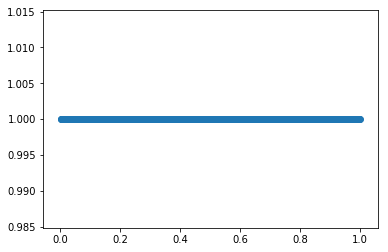

In [61]:
plt.scatter(df.X2, df.Intercept)
plt.show()

In [57]:
reg_fit.params

Intercept    1.440636
X1          -0.494787
X2           0.573988
dtype: float64

## Jackknife resampling
Bootstrap is more accurate, however it requires much more computation than jackknife which is very simple.
In jackknife, you take the set, and then remove a different element to make a new set, until you have a set of you have removed every element. You then take the average/media of all the sets to get a population estimate which is more accurate than the sames states from the single sample alone.

In [64]:
# data prep
wrench_lengths = np.array([ 8.9143694 , 10.99734545, 10.2829785 ,  8.49370529,  9.42139975,
       11.65143654,  7.57332076,  9.57108737, 11.26593626,  9.1332596 ,
        9.32111385,  9.90529103, 11.49138963,  9.361098  ,  9.55601804,
        9.56564872, 12.20593008, 12.18678609, 11.0040539 , 10.3861864 ,
       10.73736858, 11.49073203,  9.06416613, 11.17582904,  8.74611933,
        9.3622485 , 10.9071052 ,  8.5713193 ,  9.85993128,  9.1382451 ,
        9.74438063,  7.20141089,  8.2284669 ,  9.30012277, 10.92746243,
        9.82636432, 10.00284592, 10.68822271,  9.12046366, 10.28362732,
        9.19463348,  8.27233051,  9.60910021, 10.57380586, 10.33858905,
        9.98816951, 12.39236527, 10.41291216, 10.97873601, 12.23814334,
        8.70591468,  8.96121179, 11.74371223,  9.20193726, 10.02968323,
       11.06931597, 10.89070639, 11.75488618, 11.49564414, 11.06939267,
        9.22729129, 10.79486267, 10.31427199,  8.67373454, 11.41729905,
       10.80723653, 10.04549008,  9.76690794,  8.80169886, 10.19952407,
       10.46843912,  9.16884502, 11.16220405,  8.90279695,  7.87689965,
       11.03972709,  9.59663396,  9.87397041,  9.16248328,  8.39403724,
       11.25523737,  9.31113102, 11.66095249, 10.80730819,  9.68524185,
        8.9140976 ,  9.26753801,  8.78747687, 12.08711336, 10.16444123,
       11.15020554,  8.73264795, 10.18103513, 11.17786194,  9.66498924,
       11.03111446,  8.91543209,  8.63652846, 10.37940061,  9.62082357])

In [65]:
# Leave one observation out from wrench_lengths to get the jackknife sample and store the mean length
mean_lengths, n = [], len(wrench_lengths)
index = np.arange(n)

for i in range(n):
    jk_sample = wrench_lengths[index != i]
    mean_lengths.append(jk_sample)

# The jackknife estimate is the mean of the mean lengths from each sample
mean_lengths = np.array(mean_lengths)
print("Jackknife estimate of the mean = {}".format(mean_lengths.mean()))

Jackknife estimate of the mean = 10.027109074099998


In [69]:
# Leave one observation out to get the jackknife sample and store the median length
median_lengths = []
for i in range(n):
    jk_sample = wrench_lengths[index != i]
    median_lengths.append(np.median(jk_sample))

median_lengths = np.array(median_lengths)

# Calculate jackknife estimate and it's variance
jk_median_length = median_lengths.mean()
jk_var = (n-1)*np.var(median_lengths)

# Assuming normality, calculate lower and upper 95% confidence intervals
print("Jackknife 95% CI lower = {}, upper = {}".format(jk_median_length - 1.96*np.sqrt(jk_var),
                                                       jk_median_length + 1.96*np.sqrt(jk_var)))

Jackknife 95% CI lower = 9.138592415216381, upper = 10.754868124783625


## Permutation testing
A kind of non-parametric test - but different to t and chi, as there is no assumption of distribution.

In [71]:
donations_A = np.array([7.15363286e+00, 2.02240490e+00, 1.54370448e+00, 4.80860209e+00,
       7.62642561e+00, 3.30058521e+00, 2.37058924e+01, 6.92785364e+00,
       3.93432116e+00, 2.98664221e+00, 2.52205350e+00, 7.83491938e+00,
       3.46363306e+00, 3.69196795e-01, 3.04542810e+00, 8.03635944e+00,
       1.20896556e+00, 1.15751776e+00, 4.54997304e+00, 4.55351188e+00,
       6.03730837e+00, 1.13600346e+01, 7.73403302e+00, 5.66541826e+00,
       7.69038204e+00, 2.34013992e+00, 2.69451474e+00, 1.55467056e+00,
       2.08641054e+00, 5.98136359e+00, 5.79758878e-01, 3.41180026e+00,
       3.38180211e+00, 4.08357880e+00, 3.32898159e+00, 2.24607719e+00,
       3.33442862e+00, 1.34314207e+01, 1.73115909e+01, 4.18096377e+00,
       5.86824609e+00, 7.37199778e-01, 2.29007093e+00, 3.21507841e+00,
       1.20733518e+01, 1.72973646e+00, 3.95867209e+00, 2.54264298e+01,
       4.39738249e+00, 5.69434848e+00, 7.71288120e-01, 1.05039631e+01,
       5.54382280e+00, 4.72564402e+00, 2.51827118e+00, 2.17547509e+00,
       3.23763715e+00, 6.86104476e+00, 1.24986178e+01, 4.28527304e+00,
       6.63951203e+00, 5.29041637e+00, 5.88343175e+00, 6.73784273e+00,
       1.10839795e+01, 5.21162799e-01, 8.65548290e+00, 1.67563618e+00,
       1.29568920e+00, 5.09820187e+00, 6.03647739e-01, 1.29940150e+01,
       5.92106741e+00, 7.71145201e+00, 9.75641890e-02, 5.41479857e+00,
       4.88220440e+00, 1.03869381e+00, 9.96827044e-01, 7.13508703e+00,
       2.30310027e+00, 7.06535435e+00, 4.84977600e+00, 2.95546458e+00,
       1.55522115e+01, 1.10584428e+01, 2.65337427e+00, 2.67420709e-01,
       2.18105869e+00, 3.04683794e+00, 7.32384225e+00, 3.22362829e+01,
       2.63954619e+00, 8.62673398e+00, 5.39626123e+00, 7.06012667e+00,
       9.83077347e-01, 3.05372718e+00, 1.65338197e+00, 2.52459352e+00,
       4.31852605e+00, 6.59091568e+00, 6.71682860e-01, 8.41747654e-01,
       2.33147632e+00, 6.50052761e+00, 1.12445716e+01, 4.83463539e+00,
       1.15635162e+01, 2.91521595e+00, 2.28569953e+00, 2.62419344e+00,
       1.12580302e+00, 1.06005037e+01, 2.48102160e+00, 4.82273069e+00,
       5.18434570e+00, 4.42300896e+00, 1.61501034e-02, 2.67123359e+01,
       1.41448824e+01, 1.39640533e+00, 2.07601611e+00, 4.40394197e+00,
       1.39313031e+01, 2.46741537e+01, 1.78673437e+00, 4.98562121e+00,
       9.86941707e+00, 3.00891678e+00, 7.87989267e+00, 1.05376100e+00,
       5.50823207e+00, 1.20534269e+01, 2.46342324e+01, 4.96154929e-01,
       3.35534157e+00, 1.37302986e+00, 3.59396956e+00, 4.76130100e+00,
       5.87838622e-01, 2.11320218e+00, 1.57519880e+01, 5.04993508e+00,
       3.66842994e+00, 8.40299238e+00, 8.12556925e+00, 2.98791942e-01,
       7.40035604e+00, 1.09671812e+01, 1.08868440e+00, 9.11204480e+00,
       2.02574498e+00, 2.19576255e+00, 6.56643327e+00, 7.08595672e-01,
       6.55946442e+00, 1.31278715e+01, 7.15051206e+00, 3.48242496e+00,
       3.45980981e+00, 8.69147259e+00, 5.00331722e+00, 5.32358877e-01,
       5.24328366e+00, 1.01193298e+01, 2.46648252e+00, 1.57513533e+01,
       8.33499890e+00, 5.12079461e+00, 8.35735220e+00, 4.94741963e-01,
       1.17705516e+01, 1.03391383e+01, 1.44391237e+01, 8.26139805e-01,
       5.11910163e-01, 8.93893365e-01, 3.05874406e+00, 3.31308303e+00,
       4.95621045e+00, 7.82316691e-01, 1.34936676e+00, 1.00165400e+01,
       3.78653060e+00, 9.89962880e+00, 4.47245483e-02, 4.81232019e+00,
       1.61235015e+01, 5.23616216e+00, 1.38475433e+00, 7.58993321e+00,
       2.85840847e+00, 6.62266468e+00, 1.78548820e-01, 6.06196626e+00,
       1.96366145e-01, 8.19379157e+00, 3.84233798e+00, 7.78973683e-01,
       4.69365326e+00, 4.14650118e-01, 6.35689533e+00, 3.32596743e+01,
       8.80235474e+00, 5.11671494e+00, 6.49757260e-01, 7.22051924e+00,
       6.49350287e+00, 3.02060141e-01, 9.42994312e+00, 4.38779385e+00,
       3.32937247e+00, 9.31231373e+00, 3.18177591e+00, 3.93541215e+00,
       1.20263585e+00, 2.32562353e+00, 1.12066487e+01, 1.24143472e+00,
       3.24040478e+00, 2.70780118e+01, 1.61983735e+00, 1.49213797e+01,
       1.50353699e+01, 5.74417482e-01, 3.73784056e+00, 4.18553823e+00,
       2.25837113e+00, 2.90980328e-01, 1.65994352e+00, 6.02434475e-01,
       1.63282042e+00, 9.89503444e+00, 1.35215290e+01, 2.65108930e-01,
       2.15676008e+00, 2.36493902e+01, 4.65271737e+00, 5.90596197e+00,
       3.33650476e-02, 3.98047533e+00, 2.67036496e+01, 2.82180310e+00,
       6.12449905e-01, 3.71836287e+00, 1.97817485e+01, 2.50975773e+00,
       9.62439620e+00, 9.62211685e+00, 1.40104465e+00, 3.51510242e+00,
       7.54426839e+00, 3.17108474e+00, 1.27178976e+00, 2.05580402e+01,
       6.31180998e+00, 1.20353557e+01, 1.53398466e-01, 1.86288656e+00,
       4.18378790e+00, 4.18986276e-01, 2.97996482e+01, 1.61875742e+00,
       2.81323057e+00, 1.44488187e+00, 6.68579156e-01, 1.58754277e+00,
       2.14528168e+00, 6.03798635e+00, 1.98132308e+00, 2.69910531e+00,
       3.57634362e-02, 2.73158042e+00, 4.57995000e+00, 1.06053646e+00,
       5.45936403e+00, 2.08164175e+00, 5.99885739e+00, 1.59275095e-01,
       1.31137990e+01, 9.74996914e-02, 8.14629899e-01, 9.00787380e+00,
       2.81890764e-01, 7.44794442e+00, 2.12523106e+01, 1.23195060e+01,
       7.43059158e+00, 1.90937799e+01, 3.37074897e+00, 1.23756913e+01,
       2.63994493e+00, 1.59353360e+01, 9.66491466e-01, 1.68833665e+01,
       1.07283809e+01, 1.12269530e+01, 7.93807822e-01, 5.44527793e+00,
       9.91699451e-02, 7.66322715e+00, 4.66056240e-02, 5.31822002e-01,
       1.53321340e+00, 1.24826299e+01, 2.71134462e+00, 4.65865018e+00,
       5.03741184e+00, 1.53294188e+00, 5.09385035e+00, 6.48967790e+00,
       2.12502900e+00, 3.25417493e+00, 3.62081435e+00, 1.61605062e+01,
       5.31302349e+00, 1.77682601e+01, 4.87205396e+00, 4.16562392e+00,
       2.12307837e-02, 3.93382578e+00, 1.57412892e+01, 1.32661648e+00,
       3.20981488e-01, 3.13312853e+00, 2.79507990e+00, 1.16758893e+01,
       1.61829606e-01, 1.51655745e+01, 6.85356086e+00, 1.40745838e+01,
       5.61175686e+00, 1.00263901e+01, 2.45271857e+00, 2.58069478e+00,
       2.96454098e+00, 8.43401504e+00, 2.76546583e+00, 1.66417151e+00,
       1.66517164e+01, 1.43165231e+01, 2.57360606e+00, 6.04120097e+00,
       1.91992769e+00, 1.38490096e+00, 2.45990759e+00, 2.37695034e+00,
       1.28364794e+01, 1.03660801e+01, 7.41945592e+00, 1.92158339e+01,
       3.29473146e+00, 1.68648774e+00, 7.49288469e-01, 2.14908525e+00,
       9.41773910e-01, 5.80295247e-01, 5.54188934e+00, 2.71710895e+00,
       4.98853210e+00, 1.27422858e+00, 6.77886925e+00, 1.45629390e+00,
       1.95457691e+00, 8.12320517e+00, 4.92231023e+00, 2.44633364e+00,
       4.69828406e+00, 7.10472113e+00, 1.45915258e+01, 5.21520083e+00,
       1.58915801e+00, 8.23902821e+00, 9.02422786e+00, 1.34187193e+00,
       1.03079618e+01, 3.75220064e+00, 9.07840601e+00, 1.62674524e+00,
       2.42601690e+00, 1.84353066e+01, 6.43442380e+00, 8.89360329e+00,
       6.99571578e+00, 1.37122934e+00, 3.81707186e+00, 9.93175632e+00,
       6.74422911e+00, 3.62767602e-02, 5.48796568e-01, 2.55518301e+00,
       1.73337149e+01, 4.05408935e+00, 1.88971342e+00, 2.68169630e+00,
       1.41929271e+00, 3.28079030e+00, 1.47567515e+00, 1.12151812e+01,
       3.65582148e+00, 1.96937478e+00, 1.62086806e+01, 2.26433976e+00,
       1.44286812e+01, 2.66333158e-01, 7.36785267e+00, 3.96860098e+00,
       3.52430794e+00, 2.21996761e-01, 2.49203428e-01, 2.42757547e+00,
       1.76383283e+01, 5.76866972e+00, 2.76150652e+00, 5.68014458e+00,
       1.38502497e+00, 1.08241878e+00, 2.69478371e+00, 1.19421414e+01,
       4.27277801e+00, 2.11354984e+00, 1.80046649e+01, 1.01558115e+01,
       2.34027311e+00, 2.14743942e+01, 2.62211091e+01, 3.15218614e+00,
       6.40134065e+00, 3.12175373e+00, 1.78516715e+00, 5.17614704e-01,
       1.83597528e+00, 1.90043999e+00, 3.05135995e+00, 1.22656402e+00,
       1.84510434e+01, 6.51393113e-01, 5.88831298e+00, 3.49712489e+00,
       3.30486749e+00, 2.79121217e+00, 1.21640422e+01, 1.97500056e+00,
       1.24744775e-01, 1.50133191e+01, 1.19918286e+01, 1.94526138e+00,
       4.44756855e+00, 6.93059059e-01, 5.88502790e-01, 1.09012124e+01,
       3.16849927e+00, 6.50322658e+00, 1.72093727e+01, 1.68726308e+00,
       7.94831348e-02, 1.46668555e-01, 7.41454977e+00, 1.55058604e+01,
       3.77912218e+00, 2.82106969e+00, 4.69659911e+00, 1.17504345e+01,
       6.33597038e+00, 1.59145361e+00, 8.93874514e+00, 8.67474288e-01,
       1.08596642e+00, 5.69105969e+00, 1.63702407e+00, 7.32017711e+00,
       2.58025478e+00, 1.94959571e+00, 4.09759162e+01, 2.48783982e-01,
       6.22774284e+00, 2.36809873e-01, 8.56795689e+00, 1.56888959e+00,
       5.64755610e-01, 6.27241507e+00, 7.91408500e+00, 6.80099872e+00,
       3.19777776e-01, 2.09144942e+00, 3.59890663e+00, 2.03051241e+00,
       9.98062360e+00, 8.43267717e-01, 5.68327391e+00, 2.66455378e+01,
       1.39708977e+01, 1.50738393e+00, 4.91345800e-04, 2.36540713e+01,
       1.28587874e+01, 1.51149367e+01, 3.22202744e+00, 8.18990927e+00])

donations_B = np.array([1.19656474e+00, 2.49040320e+00, 9.53746976e+00, 6.82606285e-01,
       1.12152344e+01, 3.43093700e+00, 2.77646272e+00, 1.82386960e+00,
       1.24354723e+01, 3.64515134e+00, 8.14887581e+00, 9.74739510e+00,
       1.27798024e+01, 1.80758132e+00, 2.07614450e+00, 4.52025320e+00,
       2.91092911e+00, 1.35035758e+01, 2.53386965e+00, 3.24831293e+00,
       4.80103139e+00, 2.59378065e+00, 2.44499059e+01, 5.20424895e-01,
       1.24617571e+00, 1.94787364e+00, 7.99217521e-01, 1.67190676e+00,
       7.55351558e+00, 3.70006200e+00, 1.72717251e-01, 2.02629196e+01,
       4.78564798e+00, 3.03739127e-01, 5.41126574e+00, 2.37704603e+00,
       7.29022267e-01, 4.14672025e+00, 6.49288193e+00, 5.56041209e+00,
       1.42185881e+00, 3.72079438e+00, 3.85731089e+00, 6.30806898e+00,
       2.23039928e+00, 7.99082335e+00, 4.94325682e+00, 1.95427968e-01,
       3.95356876e+00, 9.89932403e+00, 4.19172221e+00, 9.66881775e-01,
       3.57059143e+00, 7.07235483e+00, 5.83260107e-01, 8.49405343e+00,
       9.16500024e-01, 3.81866902e+00, 2.43671329e+00, 1.42924389e+00,
       5.21256611e+00, 1.90545622e-01, 7.13653618e+00, 3.74267199e+00,
       1.04281517e+01, 3.67733398e+00, 1.78307749e-01, 7.75094268e-01,
       7.93849435e+00, 3.38613342e+00, 2.91589990e+00, 1.91681667e+00,
       1.67421222e+00, 1.68902829e+01, 2.83670943e+00, 1.07709562e+01,
       5.22293814e+00, 9.77472179e+00, 9.56792546e+00, 1.56534123e+01,
       5.98568505e+00, 8.18396681e+00, 6.60492872e+00, 4.64721974e+00,
       6.31780261e+00, 6.28951297e+00, 2.08840298e-01, 3.62949699e+00,
       7.86676827e+00, 1.39171038e+00, 3.12882590e+00, 2.85452129e+00,
       2.57740864e+00, 6.49629659e-01, 3.72969790e+00, 2.95519503e+00,
       5.44419240e+00, 3.98602116e+00, 1.39646740e-01, 1.62192359e-01,
       6.04257889e+00, 6.14783990e+00, 1.60867766e+01, 1.04658642e+01,
       3.15611976e+00, 4.91624772e+00, 3.05490344e+00, 1.26122869e+00,
       2.36345216e+00, 5.48428348e-01, 5.49096867e+00, 1.06615264e+00,
       3.22624219e+00, 1.71228321e+01, 1.60906182e-01, 8.22781194e-01,
       1.77323632e+00, 1.42199480e+01, 1.19757939e+01, 8.83690909e-01,
       1.98476709e+01, 6.94644470e+00, 3.88239486e+00, 1.34194386e+01,
       1.06266795e+01, 2.48228419e+00, 5.34055891e+00, 5.21189441e+00,
       1.97981339e+00, 9.88537628e-01, 3.14438608e+00, 1.52774392e+00,
       2.19302969e+00, 1.54112427e+01, 3.09147765e+00, 5.77419073e+00,
       2.04909708e+00, 2.74366001e+01, 5.37595763e+00, 1.09083892e+00,
       5.16723847e-01, 1.43393848e+01, 1.44819541e+01, 4.85542938e+00,
       8.56875560e-02, 1.27791331e+00, 8.07921149e+00, 1.04156348e+01,
       3.02558824e+00, 2.27475244e+00, 1.60257623e+00, 6.21983428e-01,
       6.15046358e-01, 1.52459499e+01, 8.26763125e+00, 9.00296751e-01,
       1.15997587e+00, 5.32905419e+00, 7.23370957e+00, 8.31194831e+00,
       8.91673722e-01, 2.07160844e+01, 1.29257185e+00, 4.45086681e+00,
       4.42899866e+00, 1.71113726e+01, 5.35986313e+00, 4.39623051e+00,
       3.65707656e+00, 7.23356770e+00, 5.60556592e-01, 1.04704613e-02,
       1.52339562e+01, 3.45233068e+00, 1.98998069e+00, 2.29475080e+00,
       8.14420766e+00, 2.40933025e+00, 7.35205890e+00, 2.90321920e+00,
       9.29197976e+00, 3.96320401e-01, 3.28049343e+00, 3.14475962e+00,
       1.53485442e+00, 1.43777379e+01, 1.17708899e+01, 2.93130586e+00,
       5.11047459e-01, 1.15829319e+00, 1.58378224e+00, 3.31037261e+00,
       2.06529770e+00, 7.43911270e+00, 3.23157187e+00, 1.02153747e+01,
       2.73416748e+01, 1.24125530e+00, 4.72951666e+00, 9.40302917e+00,
       1.45236691e+01, 1.71306021e+00, 6.49220034e+00, 7.56501614e-02,
       1.05657130e+01, 3.30370760e-01, 6.60994306e+00, 2.61164084e+01,
       3.47764789e+00, 1.17439819e+00, 4.51494278e+00, 4.89282549e+00,
       5.51419711e+00, 9.47406084e-01, 1.14489709e+01, 4.85098149e+00,
       2.22731609e-01, 5.76071513e+00, 1.09130275e+00, 1.38607479e-01,
       4.00314166e+00, 8.39162641e+00, 9.82846288e+00, 5.46401636e-01,
       5.43899659e+00, 6.19066892e+00, 1.74436298e+00, 1.77654528e+01,
       1.63341384e+00, 3.62757709e-01, 3.66235525e+00, 5.92599873e+00,
       1.40293509e+00, 2.06684785e+00, 4.14630075e+00, 1.08876171e+01,
       6.87827393e+00, 1.17602980e+00, 1.45027156e+00, 3.71043402e+00,
       7.32579387e+00, 4.82165423e+00, 3.47899613e+00, 4.54564891e+00,
       7.05416552e+00, 3.85100290e+00, 1.14018066e+01, 1.46936879e+01,
       1.23464171e+01, 7.02266520e+00, 1.41394368e+00, 2.43287242e+00,
       1.64252000e+00, 5.35975794e+00, 1.95945052e+00, 7.02008451e+00,
       6.02421971e-01, 7.46638680e+00, 4.40826278e+00, 9.02084132e+00,
       2.81828166e+00, 4.90367233e+00, 4.04180408e+00, 1.85804859e+01,
       7.04217618e+00, 3.93523752e+00, 9.55996784e-01, 1.17229878e+01,
       1.15233767e+00, 5.24972861e+00, 1.37813611e+01, 1.26530596e+00,
       1.28042313e+00, 9.54660087e+00, 8.79128574e+00, 2.16703449e+00,
       1.54007897e+00, 6.81324038e-01, 2.20876901e+01, 9.01945685e+00,
       1.14825979e+01, 3.60443525e+00, 6.07363853e-01, 2.70065678e-01,
       2.00673377e+00, 1.26493381e+01, 1.47425105e+01, 9.19941105e+00,
       8.63910869e-01, 2.72297360e+00, 1.41342568e+00, 1.14926615e+00,
       5.77314968e+00, 3.32874645e+00, 1.96454369e+00, 5.27994178e-01,
       3.93468966e+00, 2.13108335e+00, 2.48047170e+00, 1.85900630e+00,
       2.44854418e+00, 4.05807258e+00, 7.12239124e-02, 9.40777525e+00,
       1.27500978e+01, 3.99842740e+00, 1.56001807e+00, 2.31468022e+01,
       2.41600389e+00, 5.91522324e+00, 5.85514960e+00, 2.84853700e+00,
       1.11045901e+00, 1.69929104e+01, 3.29047893e-01, 3.31939247e+00,
       1.24699303e+00, 1.74051701e+00, 8.81665669e+00, 2.28852238e+00,
       4.35138357e-01, 1.09270209e+00, 9.84391818e+00, 1.88675810e+01,
       1.55975197e+00, 5.62594656e+00, 4.23428585e-01, 6.42710012e+00,
       2.69301100e+00, 1.25149408e+01, 1.86646248e+00, 1.41908227e+01,
       3.49831609e+00, 2.14540586e+00, 5.20671367e+00, 1.43671867e+00,
       1.30528897e+00, 1.09293502e+00, 1.60818403e+01, 3.39537064e+00,
       6.96387584e+00, 3.21219316e+00, 4.42808218e+00, 4.38702082e+00,
       1.95317725e+01, 5.51962876e+00, 1.37066782e+00, 7.65716357e-02,
       1.23386610e+00, 3.03961706e+00, 2.49959605e+00, 8.36525070e+00,
       7.69855084e+00, 4.66588654e-01, 1.51838886e+01, 3.74812924e+00,
       4.53670405e+00, 2.59644646e+00, 5.24198650e+00, 1.02523778e+01,
       5.60330748e+00, 1.75492405e+01, 6.03860325e+00, 8.62202031e+00,
       2.30426942e-01, 5.58436779e+00, 5.31747073e+00, 5.36512283e-01,
       9.23807883e+00, 4.76182326e+00, 5.17522808e-01, 4.51276660e+00,
       3.25442326e+00, 1.32825651e+00, 9.97692556e-02, 2.27512018e+00,
       4.83596101e+00, 1.99701112e+00, 1.83546406e+00, 6.95394709e+00,
       7.10701039e+00, 6.34283815e+00, 5.33373306e-01, 3.63006659e+00,
       4.07994991e+00, 6.82862733e+00, 1.16743908e+01, 2.30255506e+00,
       2.79888439e+00, 6.59818092e+00, 5.43297027e+00, 4.08075549e+00,
       2.15498879e+00, 1.08675397e+00, 1.01552444e+00, 4.25520297e-01,
       4.23438666e-01, 9.34746649e+00, 2.41988603e+00, 3.13312732e-01,
       1.13373289e+01, 1.26331545e+00, 1.56072383e+00, 1.08144697e+00,
       1.71327390e+01, 5.96959631e-01, 6.40360770e+00, 1.34477674e+01,
       5.51312106e+00, 9.78529163e+00, 1.38830956e+00, 5.60318499e+00,
       6.03440749e+00, 3.06551479e+00, 1.02221337e+01, 5.92716369e+00,
       1.12631586e+01, 6.99597313e+00, 3.67287201e+00, 3.45263524e+00,
       3.02318788e+00, 1.09422966e-01, 3.83011003e+00, 2.74933312e+00,
       8.57107471e-01, 6.33883845e-01, 2.98329646e+00, 2.03657147e-01,
       2.15550044e+01, 2.37504814e+00, 2.40721762e+00, 2.62397886e-01,
       2.78148941e+00, 7.93535674e-02, 1.52778707e-01, 2.07075788e+00,
       8.60098006e+00, 3.07002667e+00, 7.47590119e-02, 8.90970622e-01,
       6.73388234e+00, 6.70266269e+00, 7.02275821e+00, 2.16677245e+00,
       2.17146031e+00, 8.09935239e+00, 2.53863453e+00, 6.49491690e+00,
       4.35088990e+00, 2.26547046e+00, 4.16943480e-01, 6.17200275e-01,
       1.10163567e+01, 3.01050777e+00, 2.55837629e+01, 2.26197349e+00,
       1.43810574e+00, 2.15806492e+00, 2.10101157e+00, 5.07167830e+00,
       6.40969098e-02, 7.20414636e+00, 2.69282261e+00, 2.83027532e+00,
       3.28036515e+00, 2.98203057e+00, 3.44050864e+00, 2.12250812e+00,
       3.01969734e+00, 2.59304027e+00, 3.65157428e+00, 4.88112050e+00,
       1.37903502e+00, 3.55082736e+00, 4.51467557e+00, 8.54679048e-02,
       3.67499163e+00, 1.36753669e+00, 2.59209312e+00, 8.75875771e+00,
       1.97437390e+00, 3.30066037e+00, 1.25261799e-01, 1.84627498e+00,
       5.10438403e+00, 1.89286318e+00, 1.15208410e+00, 1.71707114e+00,
       1.54368597e+01, 4.54011799e-01, 3.11211816e+00, 3.00804073e-01,
       3.86808084e+00, 7.89329663e-01, 5.02676840e+00, 1.53532668e+00,
       5.87070109e+00, 2.13200925e+00, 2.08860049e-02, 1.74704069e+00,
       4.27214524e-01, 3.41637666e+00, 1.70464123e+00, 5.10814331e+00,
       3.46509542e+00, 1.83552565e-01, 1.91827763e+00, 3.35750764e+00,
       4.24554232e+00, 5.53938827e-01, 5.24870050e+00, 2.10566870e+00,
       1.01009927e+00, 8.18216225e+00, 3.55457791e-01, 1.32798881e+01,
       6.12540614e+00, 3.22741702e+00, 5.61181745e-02, 2.47250885e+00,
       5.18944537e+00, 9.79189626e+00, 4.80858522e+00, 2.53505970e+00,
       2.96523687e+00, 1.03294815e+01, 2.16436634e+00, 3.36886593e-01,
       2.92301171e+00, 3.23770275e+01, 2.38834759e+00, 1.07249708e+00,
       2.30901082e-01, 9.37487942e-01, 1.95828740e+00, 4.26984758e+00,
       5.47691378e+00, 2.18813468e-01, 1.37584514e+01, 1.34357116e+00,
       8.07080088e-01, 3.78394448e+00, 5.65959142e+00, 1.83545061e+00,
       5.53485390e+00, 1.74278175e+00, 1.16226977e+01, 1.06303492e+01,
       3.69278971e-01, 8.14962974e-01, 5.98761303e+00, 6.00543509e-04,
       8.62462585e+00, 2.20214501e+00, 6.82501117e+00, 2.26227605e-01,
       1.17395832e+00, 3.67184262e-01, 9.91180389e-01, 2.42596184e+00,
       3.38195979e+00, 1.23901335e+01, 4.93321755e+00, 6.12904433e+00,
       4.28392292e-01, 1.68987645e+00, 2.39767605e+01, 4.10970395e+00,
       7.75154106e+00, 1.65108656e-01, 4.39110605e-01, 5.78363060e-01,
       7.70193861e-02, 1.27538843e+01, 1.46270453e+00, 2.83747087e+01,
       6.69953255e+00, 1.44248396e+00, 2.40209331e+01, 1.01450297e+01,
       9.01605827e-01, 1.02481113e+00, 5.70008072e+00, 4.07570278e-01,
       4.39166252e+00, 3.44622894e-01, 1.25063171e+00, 1.48250410e+01,
       3.45147264e+00, 4.26321190e+00, 1.57138486e+00, 2.89964291e+00,
       7.13595387e-01, 3.63472276e+00, 2.77329902e-01, 2.47261101e-01,
       5.69167037e+00, 2.82754459e-01, 3.68323718e+00, 1.54641173e+00,
       1.03939046e+00, 4.25859180e+00, 1.75817616e+00, 3.04754587e+00,
       7.48151951e-01, 6.76153827e-01, 5.63206643e-01, 3.71248209e-01,
       4.03397323e+00, 7.05304780e+00, 7.85991283e+00, 1.58319871e+01,
       9.21972681e-01, 7.28707909e-01, 3.17396477e+00, 9.86667744e+00,
       7.28507091e+00, 4.08424219e+00, 8.52656276e-01, 2.48184126e+00,
       6.35315945e+00, 2.33733572e+00, 1.99525358e-01, 4.38395559e+00,
       6.36723217e+00, 6.27232318e+00, 9.00814473e-01, 2.04730232e+00,
       2.63115415e+00, 2.72778771e+00, 6.06086132e-01, 2.43498831e+00,
       3.53250156e+00, 6.19904790e+00, 4.21343225e+00, 2.59538588e+00,
       1.31275628e+01, 4.55755545e+00, 1.84027480e+01, 1.01011995e+01,
       5.59855814e+00, 1.14787175e+01, 2.36876132e+01, 1.24793347e+00,
       5.87298466e+00, 1.25529243e+01, 8.77666105e-02, 8.03443077e+00,
       4.68273978e-01, 1.24177956e+01, 4.73392204e+00, 8.84100221e-01,
       2.01038872e-01, 8.79611728e+00, 7.51161489e-01, 1.40289801e+01,
       4.76309817e-01, 9.10013068e+00, 2.75418195e+00, 1.03074324e+01,
       7.31748078e+00, 9.58261106e+00, 3.17667577e+00, 6.25476857e+00,
       1.91852488e+00, 2.41611024e-01, 1.32243330e+00, 6.81283489e-03,
       2.25514913e+00, 3.40440200e+00, 9.79893882e-02, 3.87992255e-02,
       5.79919858e+00, 5.29224509e-01, 3.83571092e-01, 3.42191029e+00,
       6.33206648e+00, 1.88973564e+01, 1.75060591e+00, 6.25084288e-01,
       3.54991820e-01, 1.16288135e+00, 5.27106238e-01, 1.69505065e-02,
       1.67787904e+00, 8.96870825e-01, 9.20924290e-02, 2.18967278e+00,
       8.74108057e+00, 1.80959704e+00, 6.19109167e+00, 6.52329442e+00,
       1.29443515e-01, 1.63226493e+01, 7.48358420e-01, 6.31976402e+00,
       2.38569017e+00, 1.01332035e+01, 2.64527664e+01, 1.07415949e+00])

In [74]:
# Concatenate the two arrays donations_A and donations_B into data
len_A, len_B = len(donations_A), len(donations_B)
data = np.concatenate([donations_A, donations_B])

# Get a single permutation of the concatenated length
perm = np.random.permutation(len(donations_A) + len(donations_B))

# Calculate the permutated datasets and difference in means
permuted_A = data[perm[:len(donations_A)]]
permuted_B = data[perm[len(donations_A):]]
print("Difference in the permuted mean values = {}.".format(np.mean(permuted_A) - np.mean(permuted_B)))

Difference in the permuted mean values = -0.008513669210687524.


In [96]:
reps=1000

# Generate permutations equal to the number of repetitions
perm = np.array([np.random.permutation(len(donations_A) + len(donations_B)) for i in range(reps)])
permuted_A_datasets = data[perm[:, :len(donations_A)]]
permuted_B_datasets = data[perm[:, len(donations_A):]]

# Calculate the difference in means for each of the datasets
samples = np.mean(permuted_A_datasets, axis=1) - np.mean(permuted_B_datasets, axis=1)

# Calculate the test statistic and p-value
test_stat = np.mean(donations_A) - np.mean(donations_B)
print("p-value = {}".format(2*np.sum(samples >= np.abs(test_stat))/reps))

p-value = 0.006


In [78]:
test_stat

-0.008513669210687524

In [97]:
# Calculate the difference in 80th percentile and median for each of the permuted datasets (A and B)
samples_percentile = np.percentile(permuted_A_datasets, 80) - np.percentile(permuted_B_datasets, 80)
samples_median = np.median(permuted_A_datasets) - np.median(permuted_B_datasets)

In [99]:
# Calculate the difference in 80th percentile and median for each of the permuted datasets (A and B)
samples_percentile = np.percentile(permuted_A_datasets, 80, axis=1) - np.percentile(permuted_B_datasets, 80, axis=1)
samples_median = np.median(permuted_A_datasets, axis=1) - np.median(permuted_B_datasets, axis=1)

# Calculate the test statistic from the original dataset and corresponding p-values
test_stat_percentile = np.percentile(donations_A, 80) - np.percentile(donations_B, 80)
test_stat_median = np.median(donations_A) - np.median(donations_B)

t1, t2 = test_stat_percentile, 2*np.sum(samples_percentile >= np.abs(test_stat_percentile))/reps
t3, t4 = test_stat_median, 2*np.sum(samples_median >= np.abs(test_stat_median))/reps

print("80th Percentile: test statistic = {}, p-value = {}".format(t1, t2))
print("Median: test statistic = {}, p-value = {}".format(t3, t4))

80th Percentile: test statistic = 1.6951624520000035, p-value = 0.018
Median: test statistic = 0.6434965699999999, p-value = 0.016
